# Figures from "Spatially organized multicellular immune hubs in human colorectal cancer"
## Code for key pannels included in Figure 1


In [1]:
code = '../code/';
codeExternal =  '../external';
data = '../data/';



In [ ]:
run([code 'util/run_set_figure_defaults.m']);

% Other options (e.g. svg or eps) are possible:
outSuf = { '-dpng' } 
outDirPlot = { '../results/figures/' };


zColSet = 

  struct with fields:

           rainbow14: {1x14 cell}
           rainbow15: {1x15 cell}
           rainbow18: {1x18 cell}
           rainbow21: {1x21 cell}
        crcTypeColor: {'#0072B2'  '#B2DF8A'  '#E41A1C'  '#FB9A99'}
            crcTypeC: {'#E41A1C'  '#0072B2'  '#B2DF8A'}
    crcTypeColorName: {'MSS'  'Normal'  'MSI_MLH1Meth'  'MSI_MLH1NoMeth'}


zColSet = 

  struct with fields:

           rainbow14: {1x14 cell}
           rainbow15: {1x15 cell}
           rainbow18: {1x18 cell}
           rainbow21: {1x21 cell}
        crcTypeColor: {'#0072B2'  '#B2DF8A'  '#E41A1C'  '#FB9A99'}
            crcTypeC: {'#E41A1C'  '#0072B2'  '#B2DF8A'}
    crcTypeColorName: {'MMRP'  'Normal'  'MMRd'  'MMRd_MLH1NoMeth'}



In [ ]:
addpath(genpath(code))

In [ ]:
addpath(genpath(codeExternal))

## Loading main data object

In [ ]:

colon10x_default = readDataRobj([ data 'colon10x_default/' ])

## Loading tSNE coordinate files

In [ ]:


[zFile,~,zFname] = fileList([ data 'cNMF_tSNE/*.gz']);

zFname = regexprep(zFname,'.tsv.gz','');
zFname = regexprep(zFname,'crc295v4_cNMF_tSNE_','');
zFname = regexprep(zFname,'allImm','Imm');
zFname{end} = 'global';

for zi = 1:length(zFname)
   [zRaw,~,zH] = fastMatRead(zFile{zi});    
   tSNE_coord.(zFname{zi}).sampleID = zH;
   tSNE_coord.(zFname{zi}).ydata = zRaw;
end

tSNE_coord

## Load ccNMF summary file

In [ ]:
ccNMFexpAlt = load([ data 'matlab/crc10x_c295v4_basic_ccNMFv6_reExp_qN_subSet.mat'])

zSubG = ismember(ccNMFexpAlt.ensgID,colon10x_default.ensgID);
ccNMFexpAlt = structSubSelectMat(ccNMFexpAlt,zSubG);
assert(isequal(ccNMFexpAlt.ensgID,colon10x_default.ensgID));

In [96]:
zOutP = 'Figure_5_6_7'

zMergeT = struct2table(groupTable(colon10x_default.metatable,'PatientTypeID'));

colon10x_default.metatable.MMRStatusTumor = colon10x_default.metatable.MMRStatus;
colon10x_default.metatable.MMRStatusTumor = regexprep(colon10x_default.metatable.MMRStatusTumor,'NA','Normal');

zBID = mergeStringPair(colon10x_default.metatable.MMRStatusTumor,colon10x_default.metatable.PatientTypeID);


zOutP =

    'Figure_4_5_6'

Done - return


In [97]:
zOutP = 'Figure_5_6_7'

% Load ccNMF covariation analsysi
% pEpiTd 
zOutCC_MSI = load([ data 'matlab/basic_corr_qNorm_v5_1K/ccNMFcorrActiv_c295_EpiTMSI_K29_MSITumor.mat']);

% pEpiTd on both MMRp and MMRd tumors samples 
zOutCC_MSI_both = load([ data 'matlab/basic_corr_qNorm_v5_1K/ccNMFcorrActiv_c295_EpiTMSI_K29_BothTumor.mat']);

% pEpiTd on Epithelial normal samples
zOutCC_MSI_Normal = load([data 'matlab/basic_corr_qNorm_v5_1K/ccNMFcorrActiv_ccNMFcorrActiv_c295_EpiTMSI_K29_MSITumor_testNormal.mat' ]);

% pEpiTd on MMRp only samples
zOutCC_MSI_MSS = load([ data 'matlab/basic_corr_qNorm_v5_1K/ccNMFcorrActiv_ccNMFcorrActiv_c295_EpiTMSI_K29_MSITumor_testMSS.mat' ]);

% pEpiTd on NMF program activity from Lee et al cohort (GSE144735 and GSE132465)
zOutCC_extern = load([ data 'matlab/basic_corr_qNorm_v5_1K/ccNMFcorrActiv_concordance_all_NMFnew_merged.mat' ]);


In [110]:
%%

zMCl = zOutMat_sig.outTable;
zNames = zOutMat_sig.xNameOrd;

[zidx] = find(zMCl);
[zi,zj,zv] = find(zMCl);

zSel = zi > zj;

zi = zi(zSel);
zj = zj(zSel);
zv = zv(zSel);
zidx = zidx(zSel);

zKnnEdgeT = table([zi zj],'VariableNames',{'EndNodes'});
zKnnEdgeT.Weight = (zv);


clear zNodes
zNodes.Names = zNames(:);
zNodes.type = regexprep(zNodes.Names,'_.*','');

zNodes = structRowsToColumns(zNodes);
zNodes = struct2table(zNodes)

zG = graph(zKnnEdgeT,zNodes);

%% Signed graph clustering:
% [zM_alt,zOutNew_alt] = graph_cluster_hc(zG);

load([data 'matlab/ccNMF_HC_cluster_alt_MSI.mat'])

%%

zCM = zM_alt;
zCM.nodeIdx = zG.Nodes.Names(zM_alt.nodeIdx);

% %% 

% zopts = zOutCC_MSI.opts.coexpHeatmapOpts;
% zopts.outTables = 0;
% zopts.sigThr = [];
% zopts.clMap = zCM;
% % 
% zopts.sigThrTxt = 0.1;

% [zfigOut,zOutTable,zOutMat_sig_MSI] = ccNMF_plot_coAct(zOutCC_MSI,[],zopts);

% delete(zfigOut.Children(end-1:end))

% %%

% zFig = gcf;
% zOutF = sprintf('%s/Fig5_ccNMF_coAct_EpiMSI_heatmap',zOutP)
% print_plot(zFig,zOutF,outDirPlot,outSuf,1)
    


zNodes =

  72x2 table

                              Names                                      type        
    __________________________________________________________    ___________________

    'EpiTMSIv4ForceK29_zz_Epi_01_FosJun_EpiN1'                    'EpiTMSIv4ForceK29'
    'Myeloid_zz_Myeloid_04_FosJun'                                'Myeloid'          
    'T_zz_TNKILC_01_FosJun'                                       'T'                
    'EpiTMSIv4ForceK29_zz_Epi_29_SPINK4_AGR2_EpiN13'              'EpiTMSIv4ForceK29'
    'T_zz_TNKILC_08_Tinnate'                                      'T'                
    'EpiTMSIv4ForceK29_zz_Epi_15_TFF3_MUC2_ZG16_EpiN10'           'EpiTMSIv4ForceK29'
    'EpiTMSIv4ForceK29_zz_Epi_26_TFFN_GSN_EpiN17'                 'EpiTMSIv4ForceK29'
    'EpiTMSIv4ForceK29_zz_Epi_07_Regs'                            'EpiTMSIv4ForceK29'
    'Myeloid_zz_Myeloid_10_CCL2_SPP1'                             'Myeloid'          
    'Myeloid_zz_Myeloid_14_M

In [107]:
pMap = load([ data 'matlab/program_names']);

Done - return
Block-wise HC 
Per block optimal leaf order
Running 1 of 11 (3 smp)
Running 2 of 11 (9 smp)
Running 3 of 11 (1 smp)
Running 4 of 11 (7 smp)
Running 5 of 11 (1 smp)
Running 6 of 11 (6 smp)
Running 7 of 11 (11 smp)
Running 8 of 11 (21 smp)
Running 9 of 11 (11 smp)
Running 10 of 11 (1 smp)
Running 11 of 11 (1 smp)

zOrdTX =

     []

Using external Y order
Using external X order
Nothing to subset (selecting all)
                   legendFig: 1
                  sortLegend: 1
                legendOrient: 'Vertical'
               groupColorMap: {[12x3 double]  [8x3 double]  [12x3 double]}
                        grey: [0.6627 0.6627 0.6627]
                     axisObj: []
                     showTxt: 2
          XTickLabelRotation: 60
                     doSortY: 0
                     doSortX: 0
         doLeafOptimalOrderY: 0
    doLeafOptimalOrderY_data: [1x1 struct]
         doLeafOptimalOrderX: 0
    doLeafOptimalOrderX_data: [1x1 struct]
                externXOrder

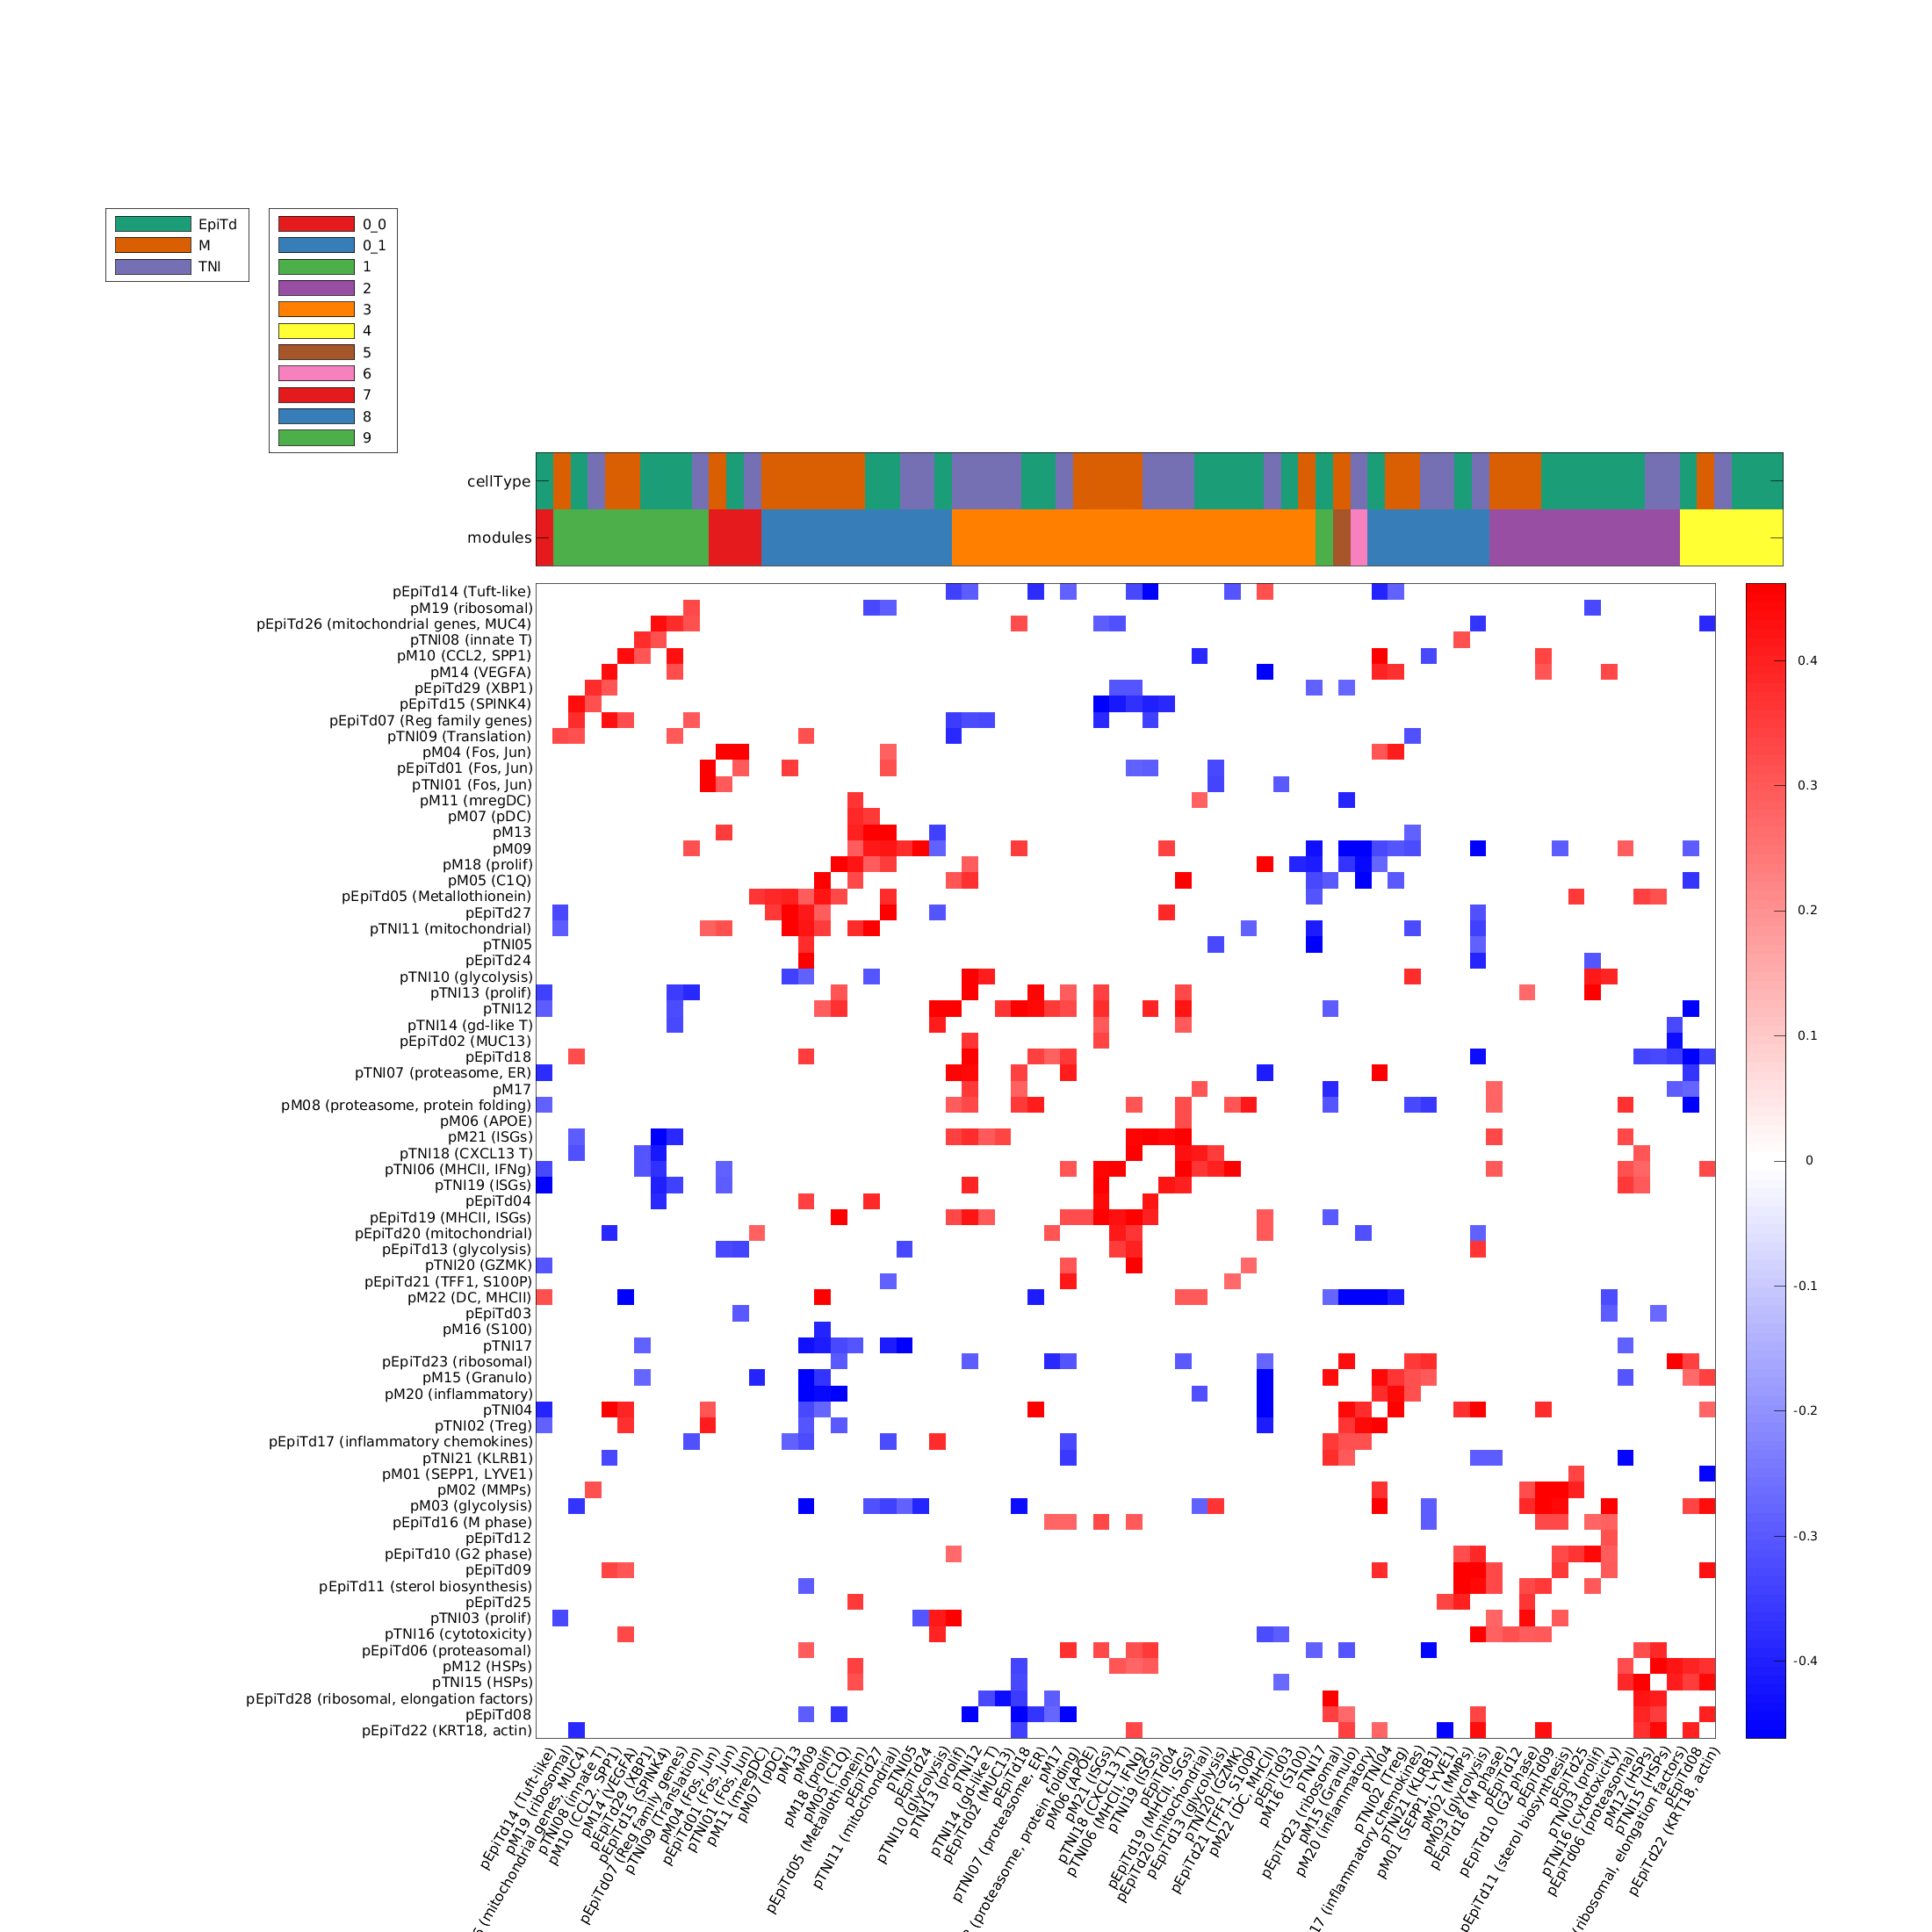

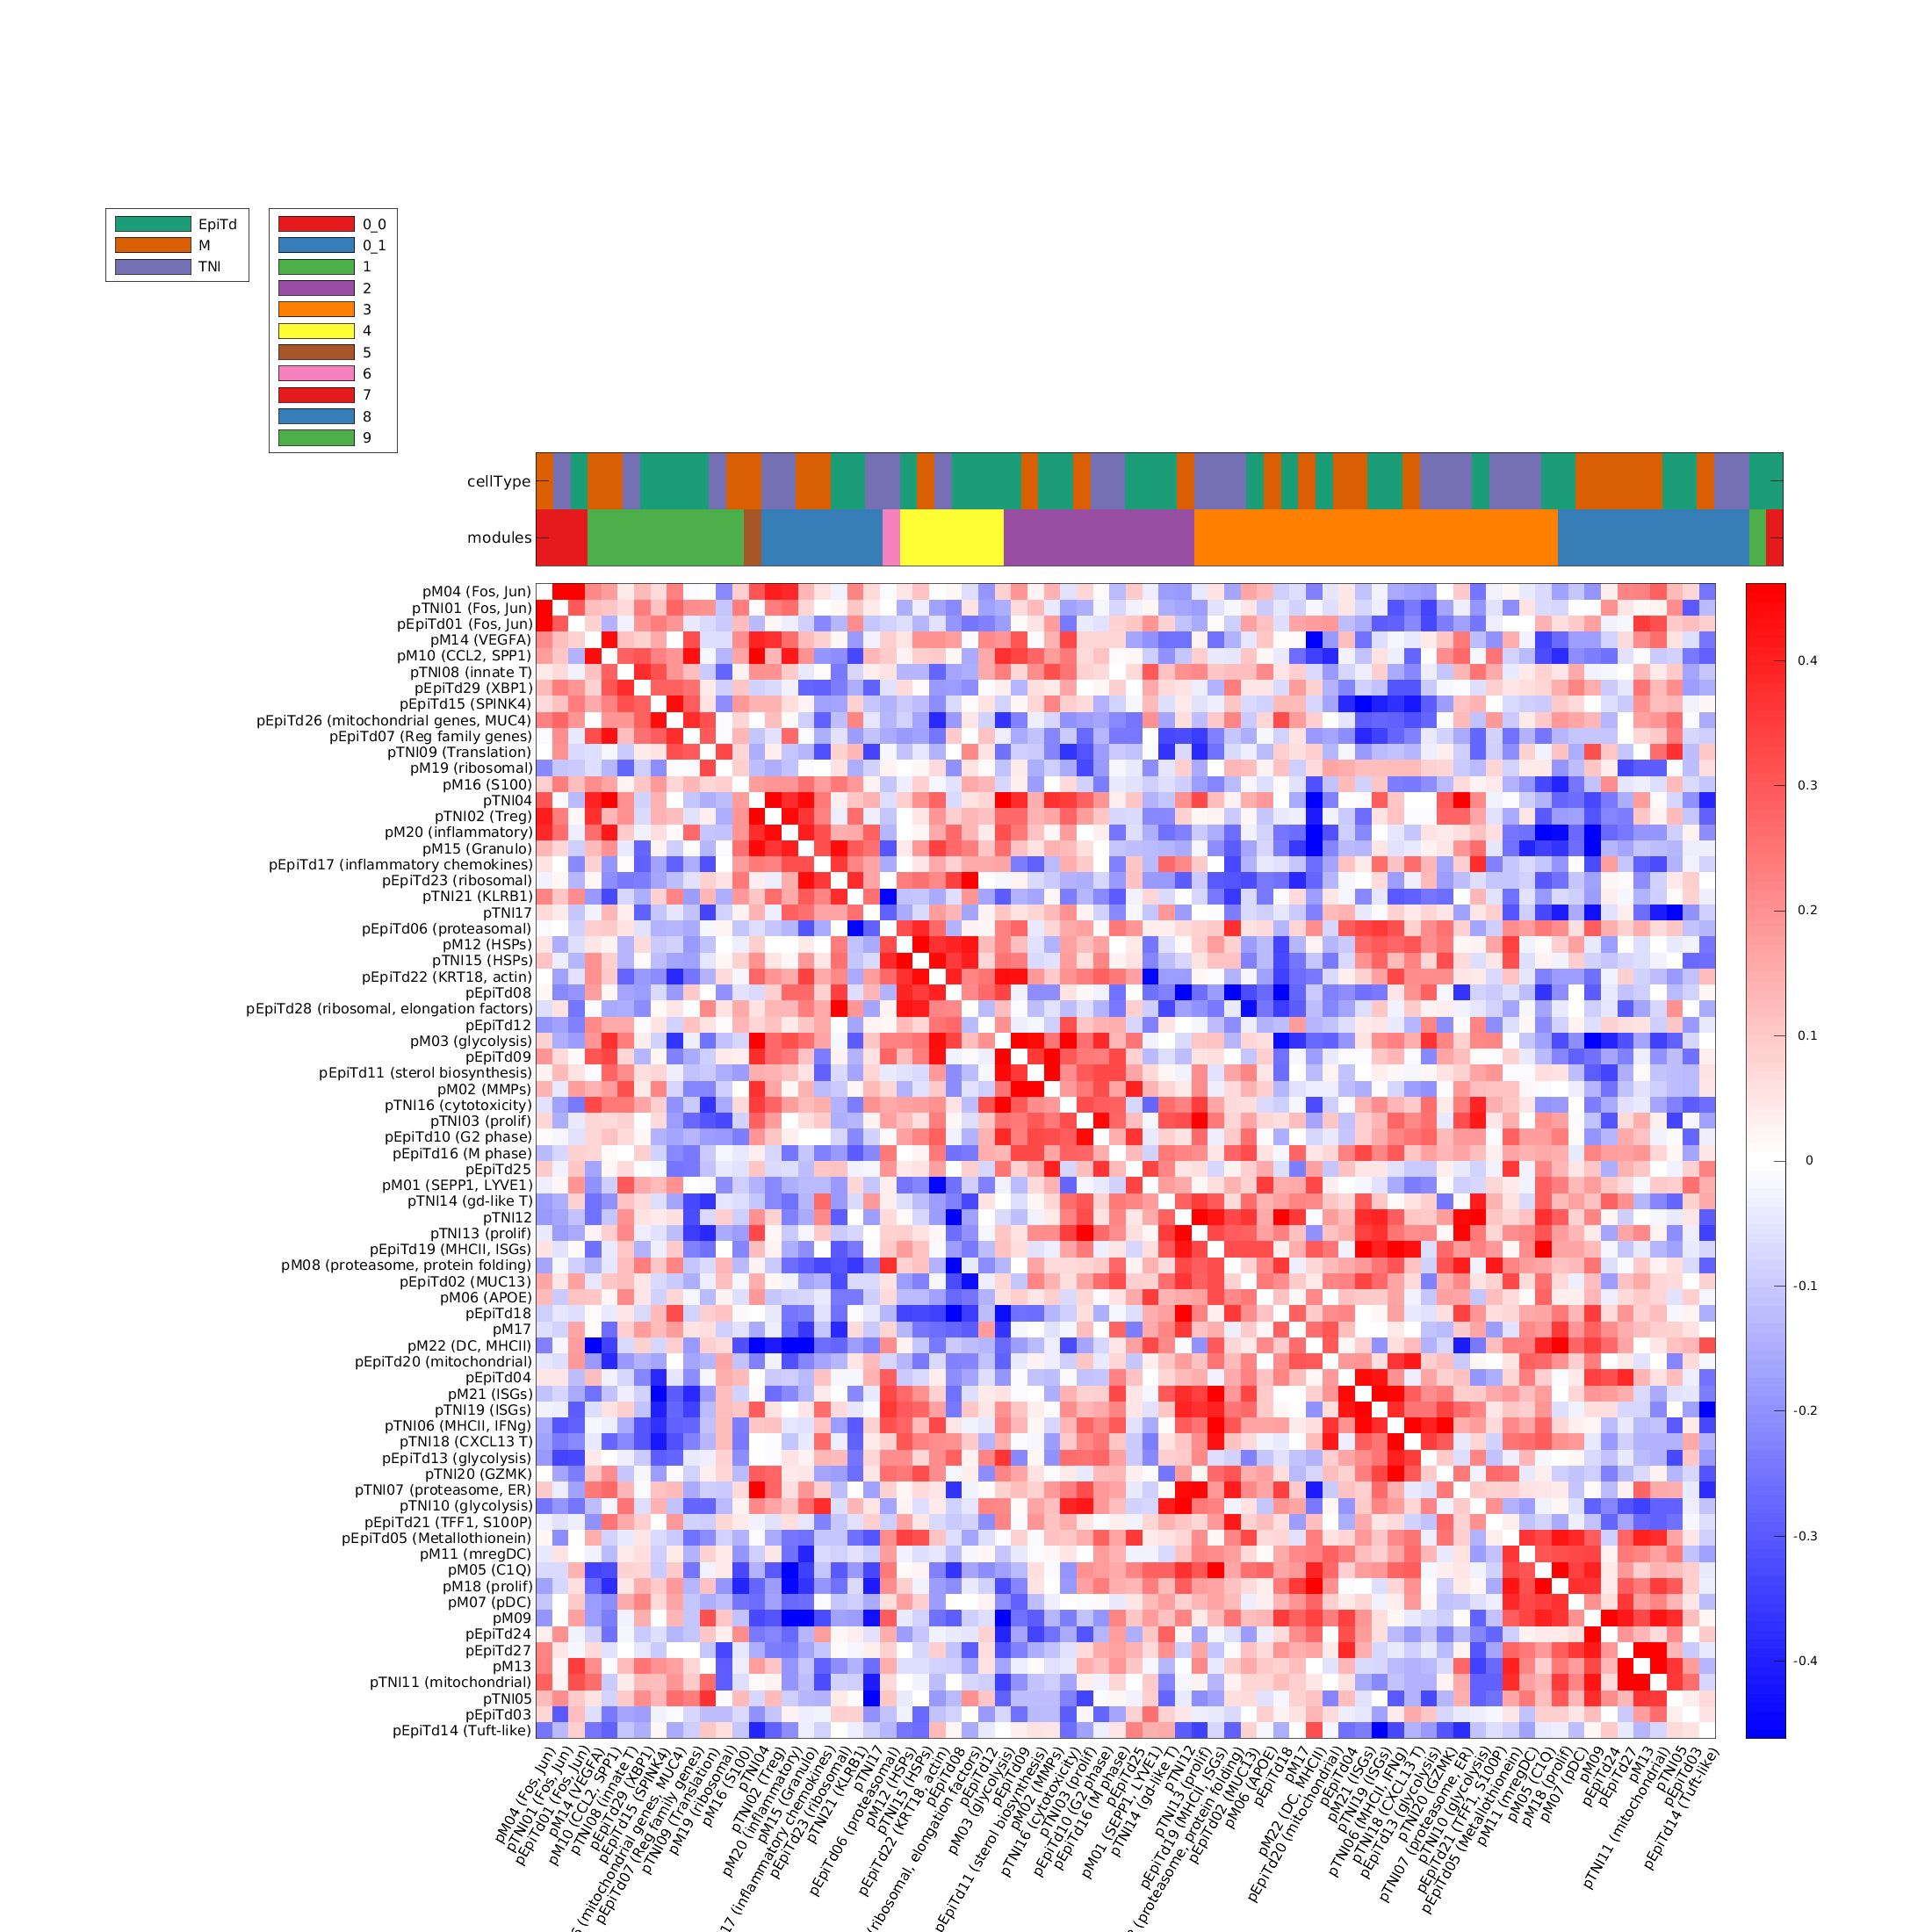

In [114]:
%%

zTypeNamesOut = { 'pB' 'pS' 'pTNI' 'pM' 'pP' 'pMA' 'pEpiTd' 'pEpiTp' 'pEpi' };
zTypeNamesCellTstr = { 'B' 'Stromal' 'T/NK/ILC' 'Myeloid' 'Plasma' 'Mast' 'Epithelial' 'Epithelial' 'Epithelial' };
zTypeNamesCellT = { 'B' 'Strom' 'T' 'Myeloid' 'Plasma' 'Mast' 'EpiTMSIv4ForceK29' 'EpiTMSSv4ForceK32' 'EpiTGlobalv5ForceK43' };

zCellTypeStr = cell2struct(zTypeNamesCellTstr',zTypeNamesOut');
zCellTypeStrT = cell2struct(zTypeNamesCellT',zTypeNamesOut');
%%

zNamesP = regexprep(zOutCC_MSI.outMS.hMatNames,'.*_zz_','');
zNamesAll = regexprep(zNamesP,'([^_]*)_([^_]*)_.*','$1$2');

zNamesAll = regexprep(zNamesAll,'Epi','pEpiTd');
zNamesAll = regexprep(zNamesAll,'TNKILC','pTNI');
zNamesAll = regexprep(zNamesAll,'Myeloid','pM');


zNameMap = containers.Map(zOutCC_MSI.outMS.hMatNames,zNamesAll);
zNameToFull = containers.Map(pMap.PnamesID,pMap.Pnames);

zCM = zM_alt;
zCM.nodeIdx = nanvalues(zNameToFull,nanvalues(zNameMap,zG.Nodes.Names(zM_alt.nodeIdx)));
zCM.nodeIdx;


zOutCC_MSI_rename = zOutCC_MSI;
zOutCC_MSI_rename.outMS.hMatNames = nanvalues(zNameToFull,nanvalues(zNameMap,zOutCC_MSI_rename.outMS.hMatNames));
% zOutCC_MSI_rename.outMS.hMatNames

zopts = zOutCC_MSI_rename.opts.coexpHeatmapOpts;
zopts.outTables = 0;
zopts.sigThr = [];
zopts.clMap = zCM;
% 
zopts.sigThrTxt = 0.1;

[zfigOut,zOutTable,zOutMat_sig_MSI] = ccNMF_plot_coAct(zOutCC_MSI_rename,[],zopts);

delete(zfigOut.Children(end-1:end))

zFig = gcf;
zOutF = sprintf('%s/Fig5_ccNMF_coAct_EpiMSI_heatmap',zOutP)
print_plot(zFig,zOutF,outDirPlot,outSuf,1)

%%

zopts = zOutCC_MSI_rename.opts.coexpHeatmapOpts;
zopts.outTables = 0;
zopts.sigThr = 0.1
zopts.clMap = zCM;
% 
% zopts.sigThrTxt = 0.1;

[zfigOut,zOutTable,zOutMat_sig_MSI] = ccNMF_plot_coAct(zOutCC_MSI_rename,[],zopts);

delete(zfigOut.Children(end-1:end))


Simple p-value
Using external R to pick direction
Using external R to pick direction
Using external R to pick direction
Done - return

nodeSizeF =

  function_handle with value:

    @(x)max(3+10*x,5)*1.5


zf =

    'c0_0'


zMSize =

    0.1794
    0.5108
   -0.0492


zMSize =

    7.5000
   12.1618
    7.5000


zMSize =

    0.3259
    0.5807
    0.2580

Saving plot: ../results/figures//Figure_5_6_7/ccNMF_coAct_EpiMSI_4way_absWeightRadj_c0_0_graph.png.-dpng

zf =

    'c1'


zMSize =

    0.3443
   -0.3165
   -0.3420
   -1.0915
    2.1411
    4.4229
    1.9402
   -0.1777
   -0.5924


zMSize =

    9.6643
    7.5000
    7.5000
    7.5000
   36.6166
   70.8433
   33.6032
    7.5000
    7.5000


zMSize =

    0.0206
   -0.7633
   -0.5036
   -1.7034
    1.0894
    4.0607
    1.6070
   -0.2263
   -0.2592

Saving plot: ../results/figures//Figure_5_6_7/ccNMF_coAct_EpiMSI_4way_absWeightRadj_c1_graph.png.-dpng

zf =

    'c2'


zMSize =

    0.2688
    1.8755
    2.8544
    2.9879
    3.5317

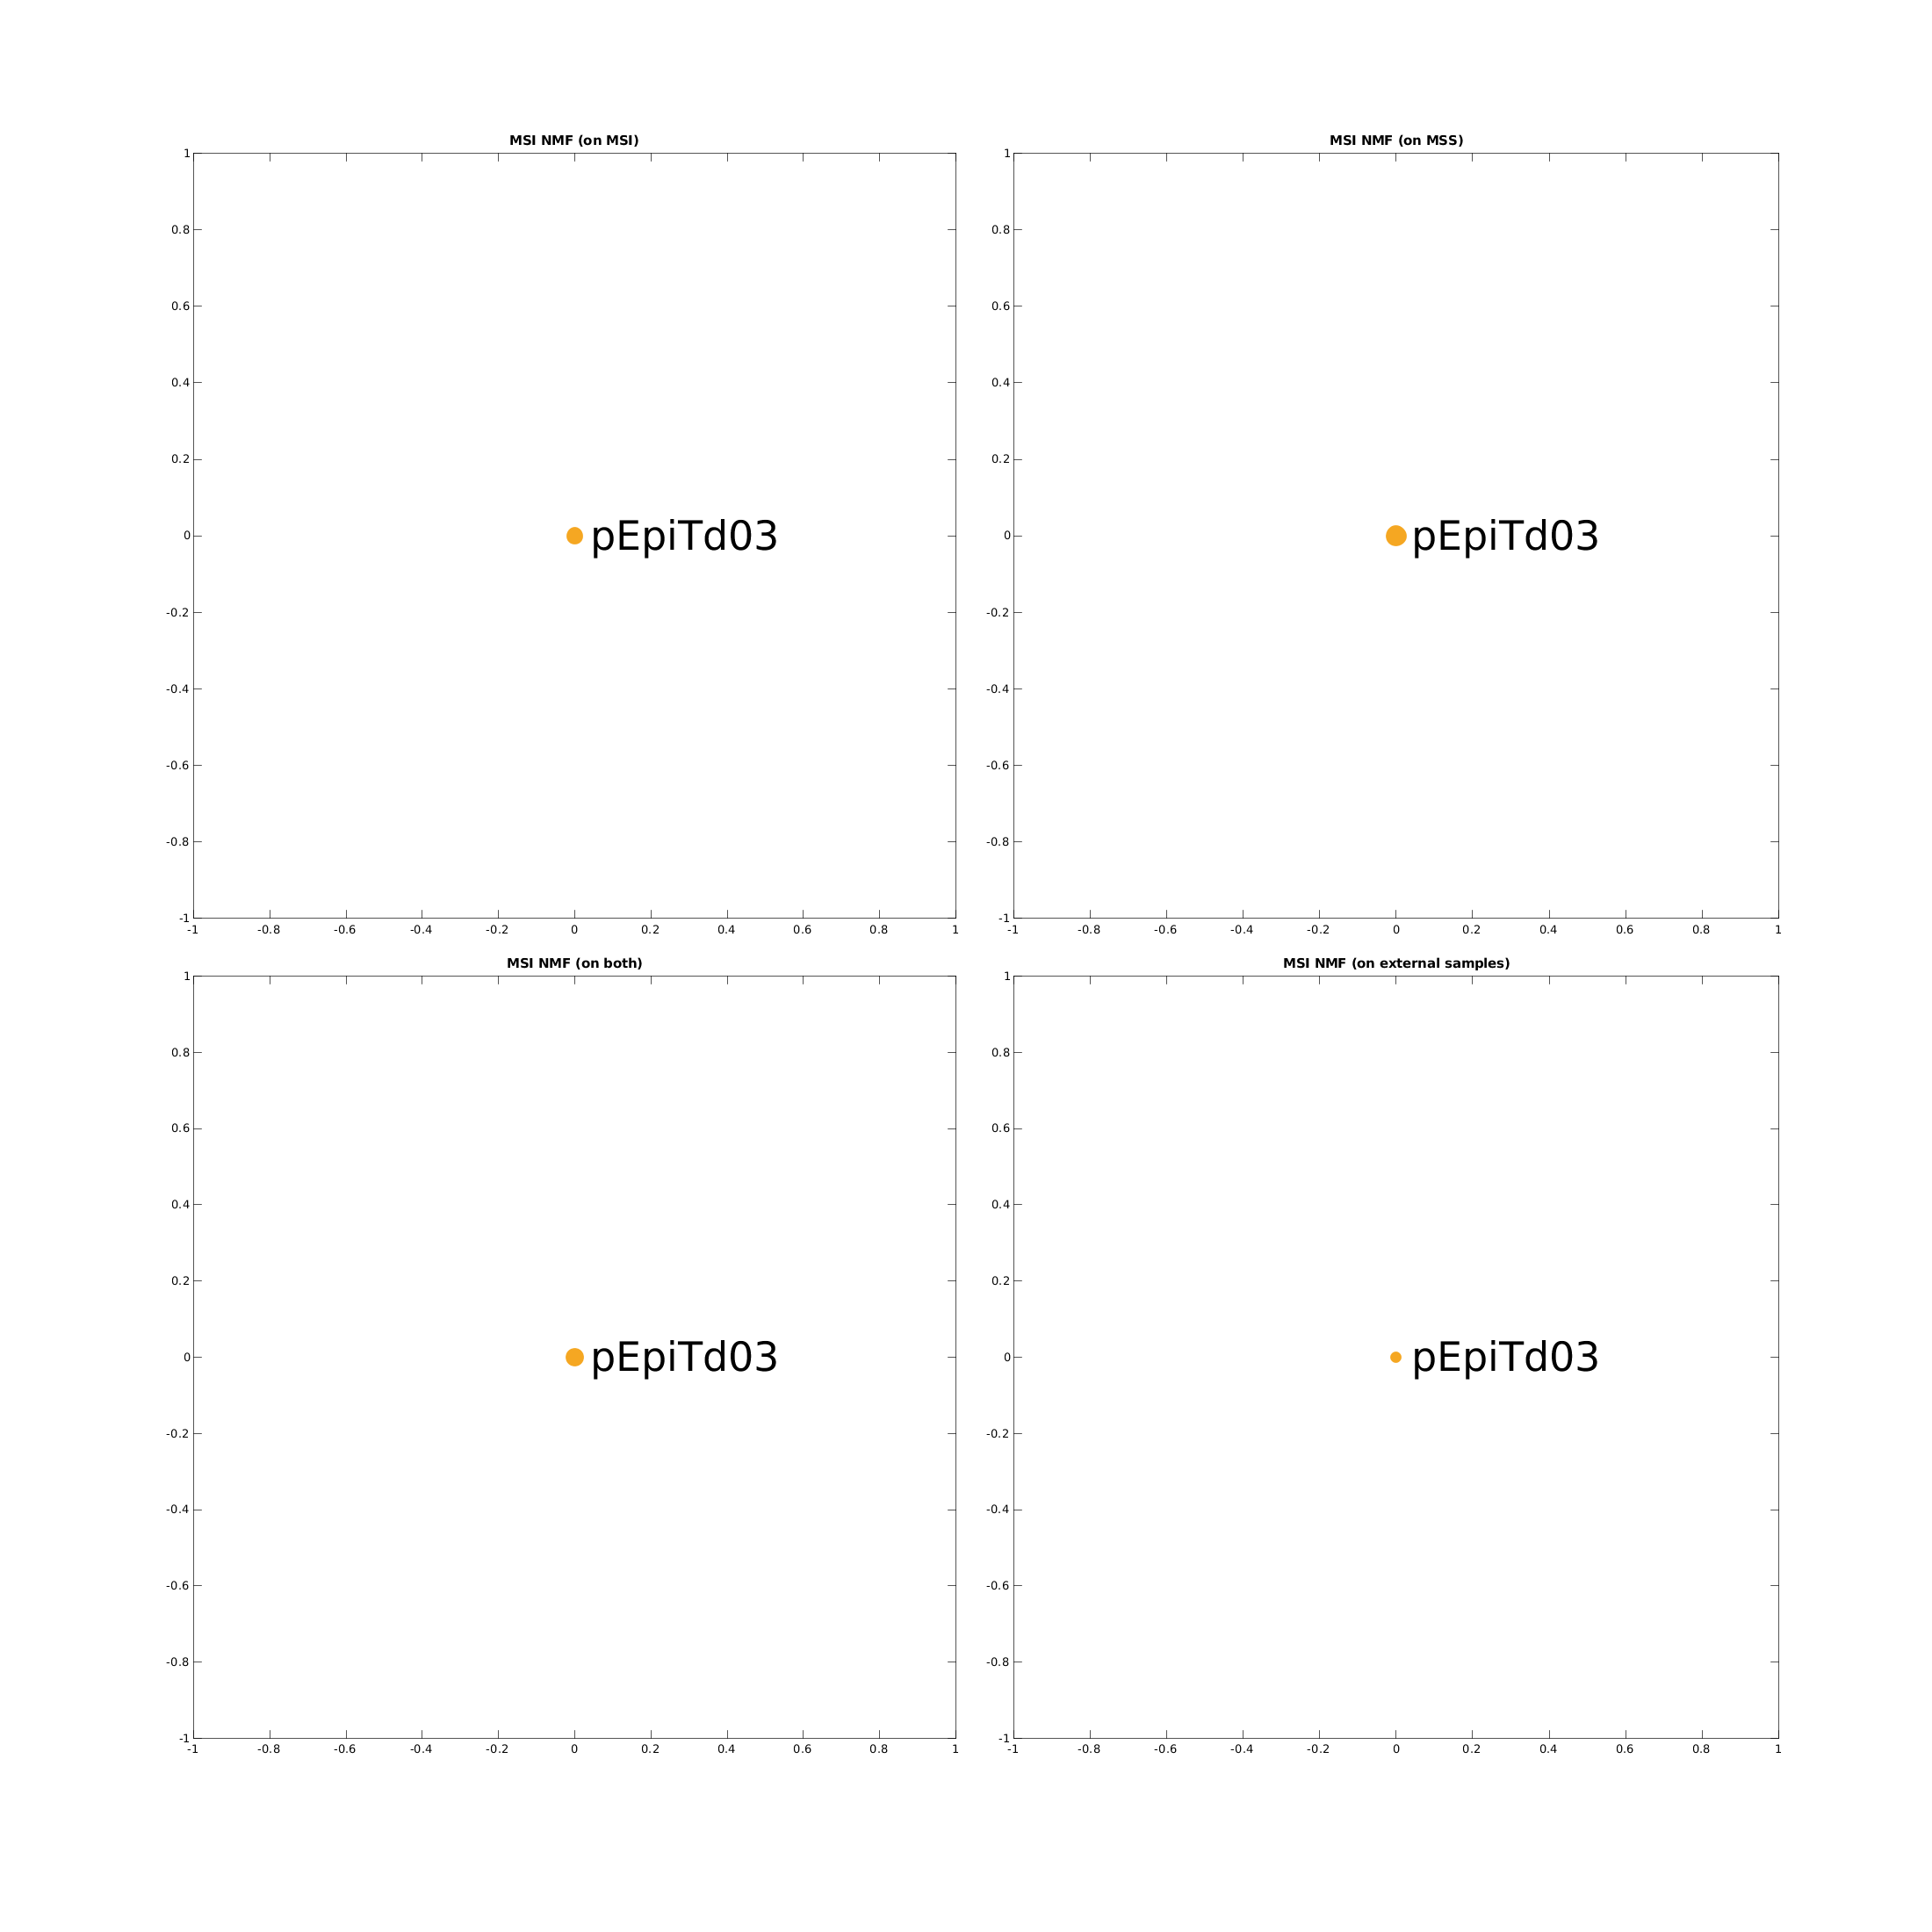

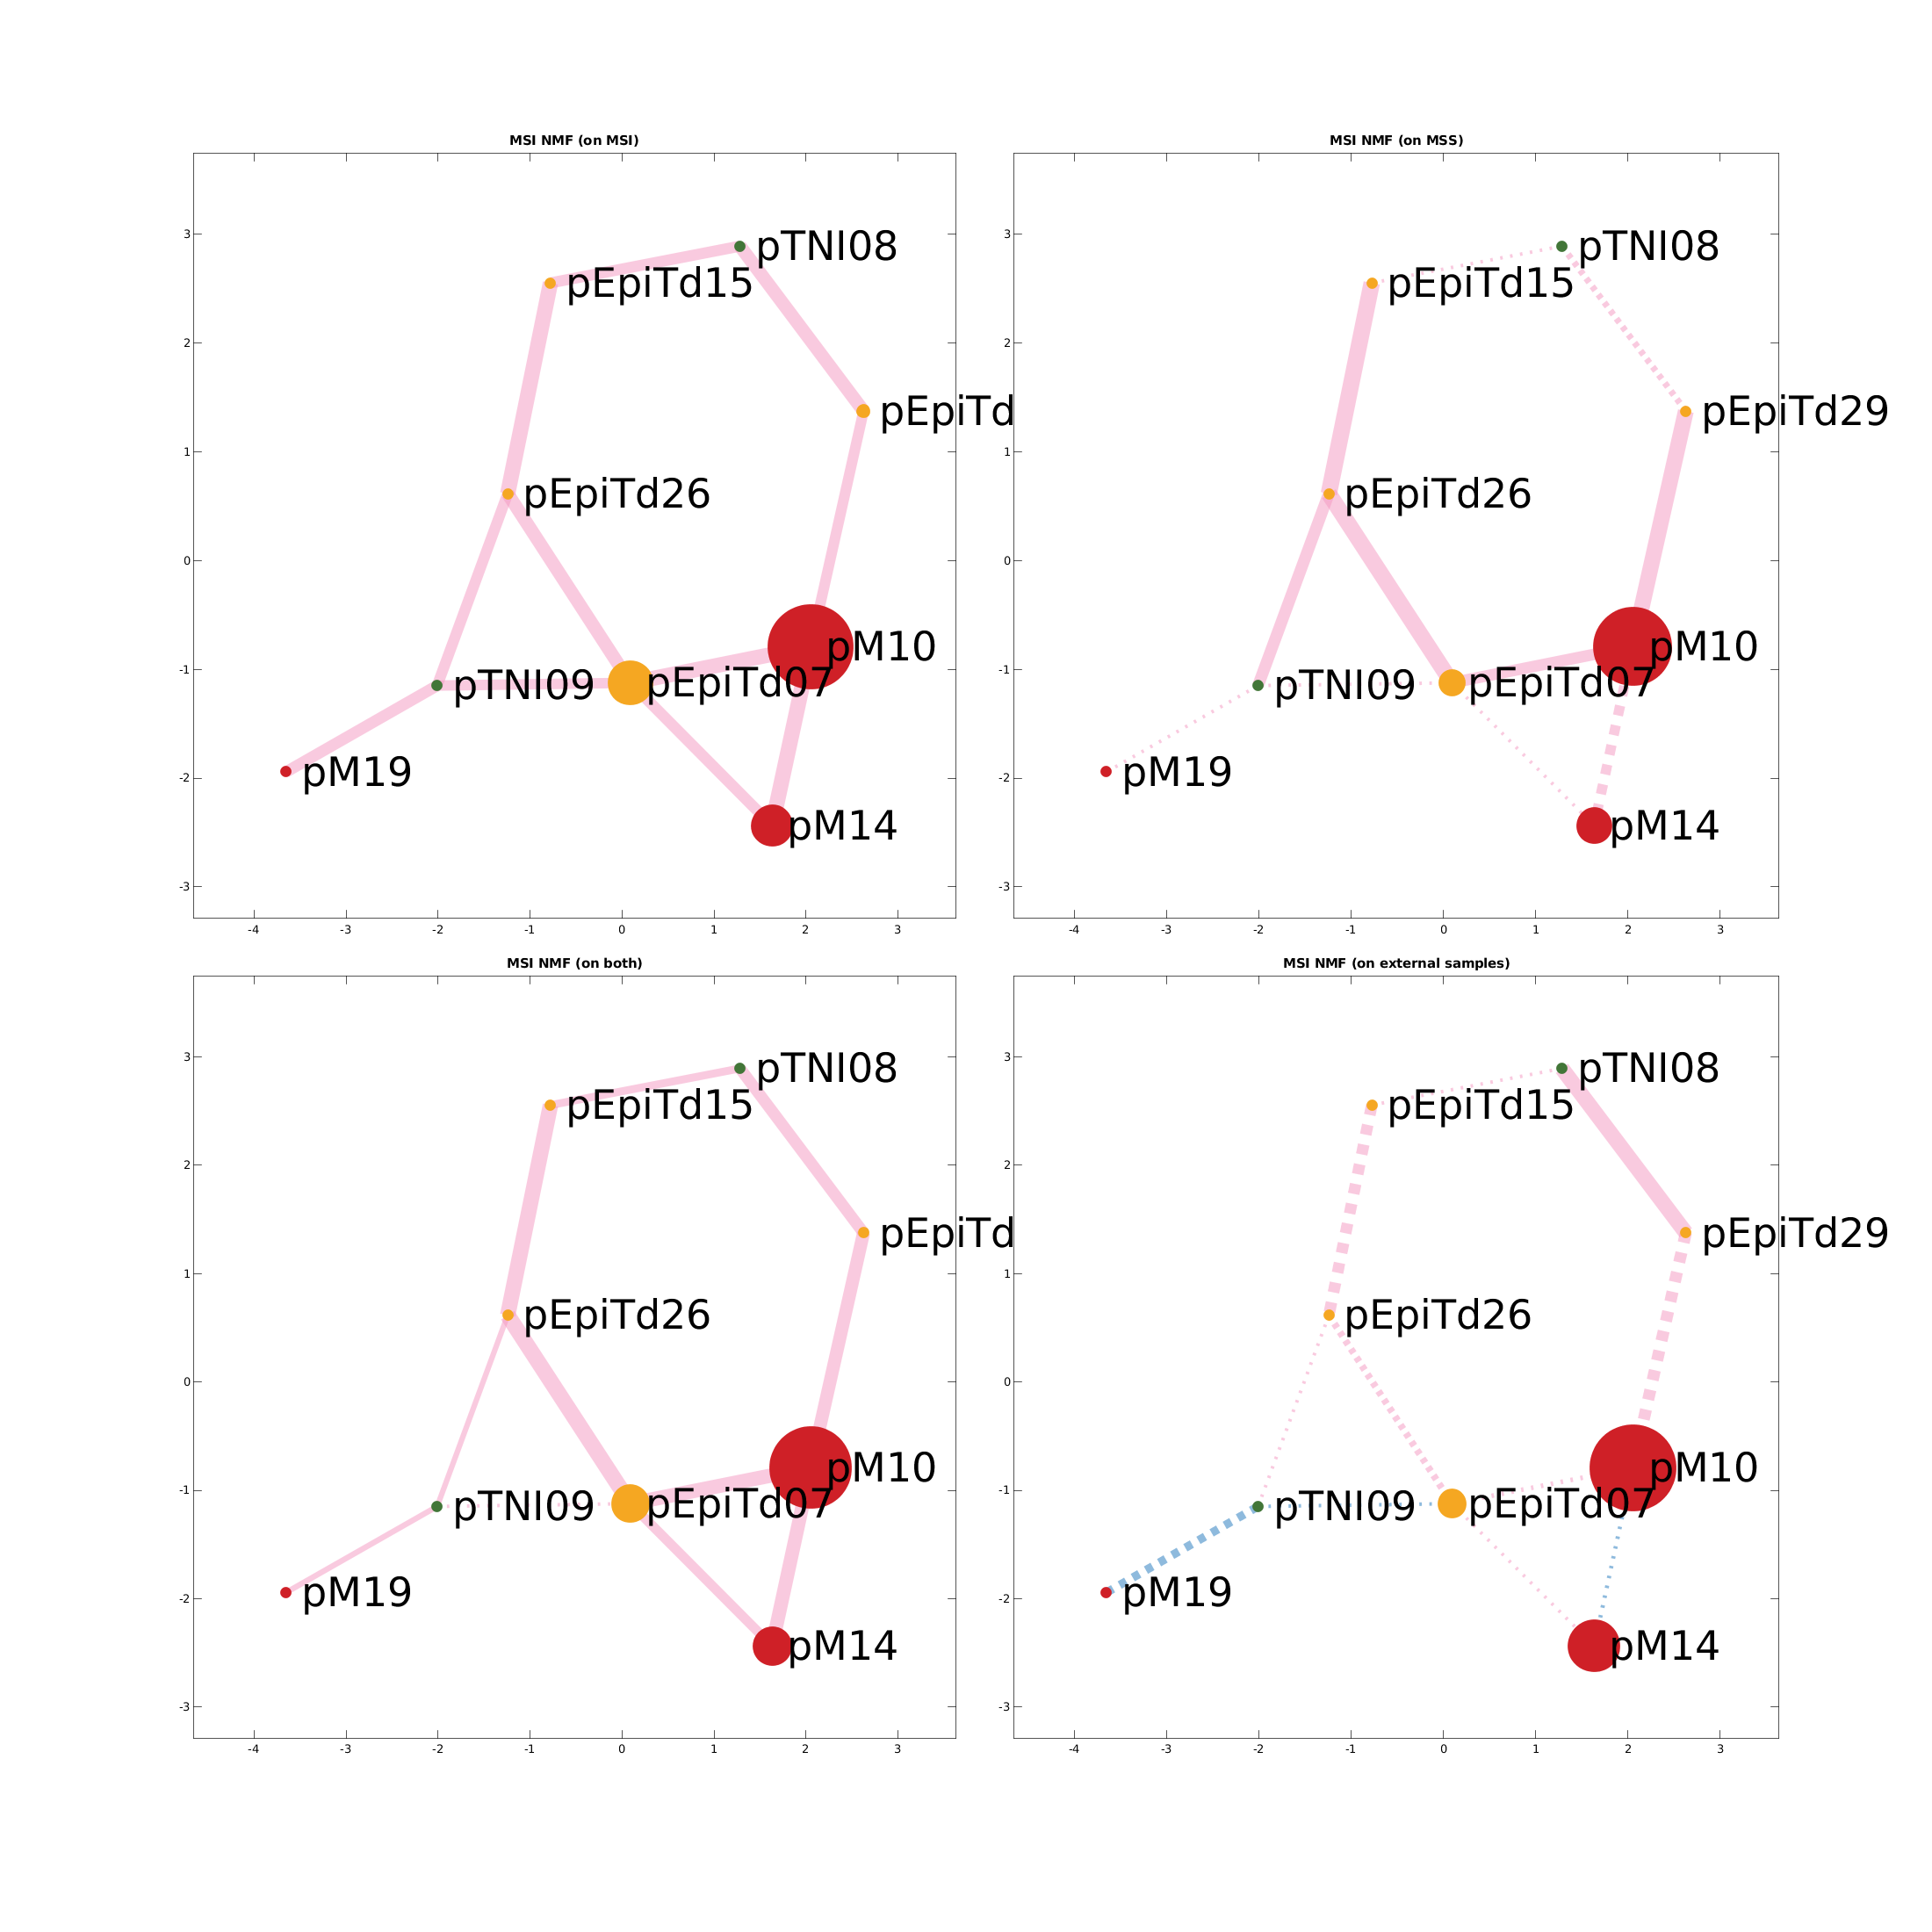

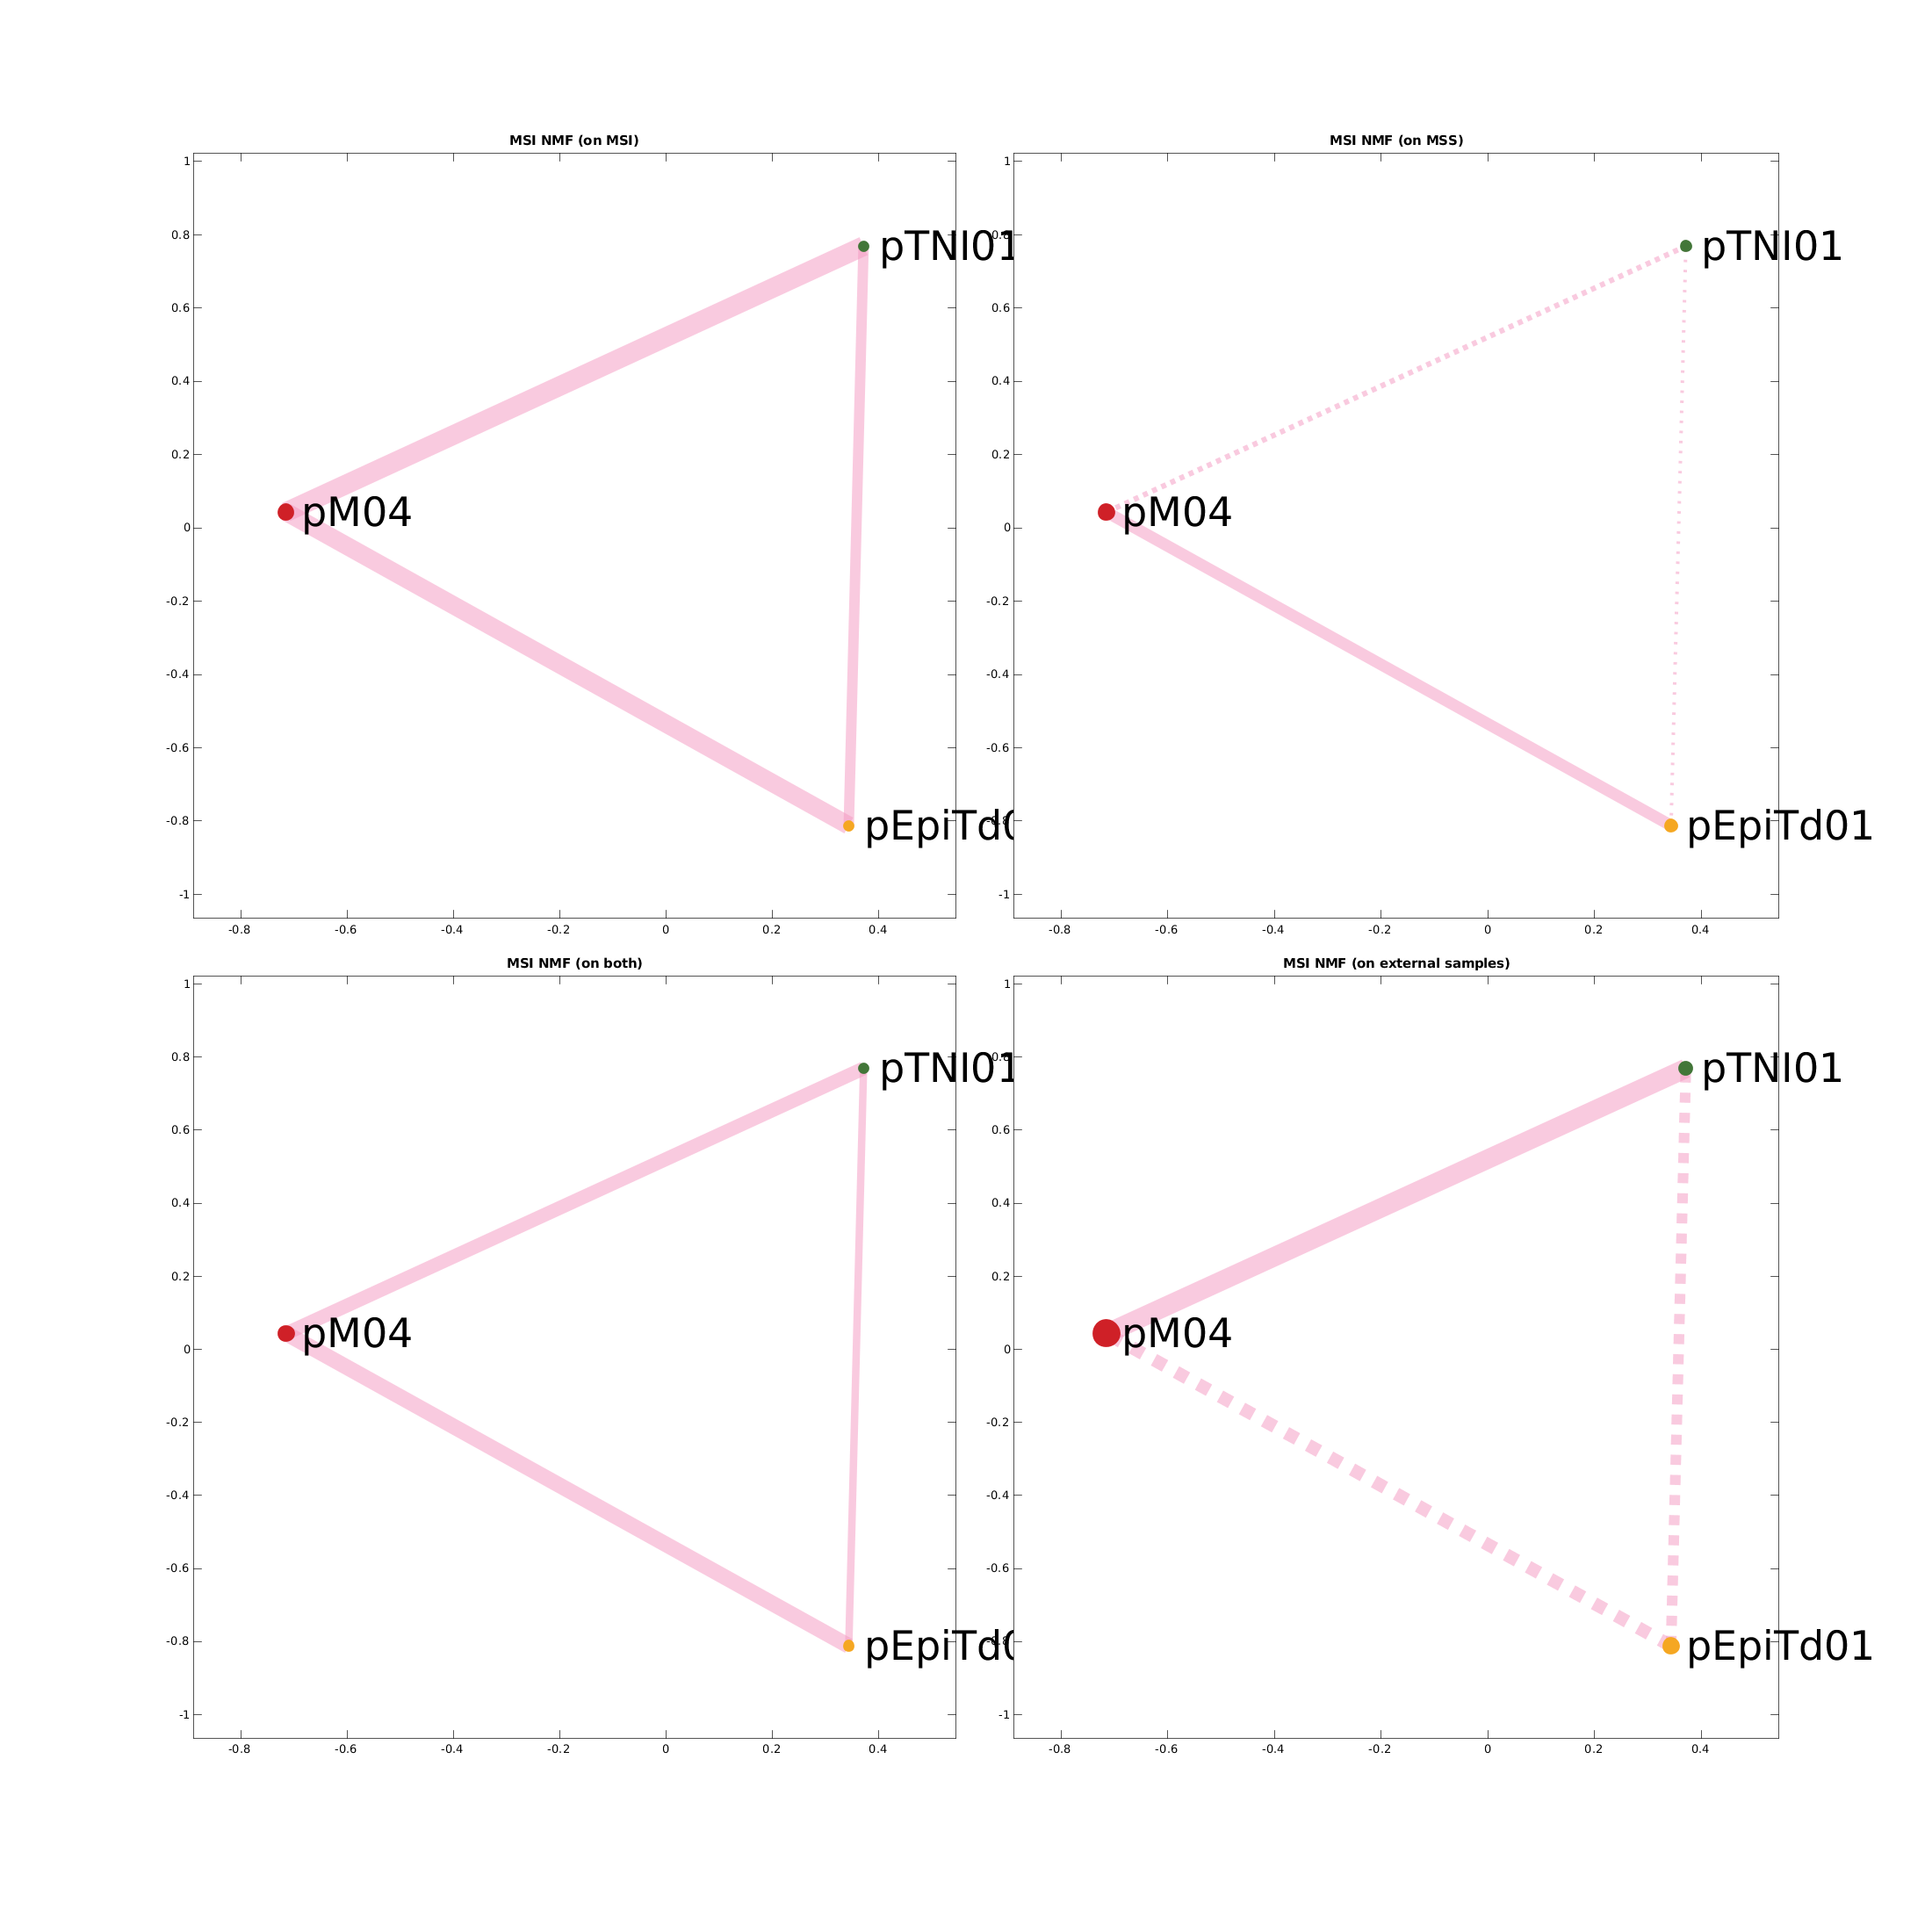

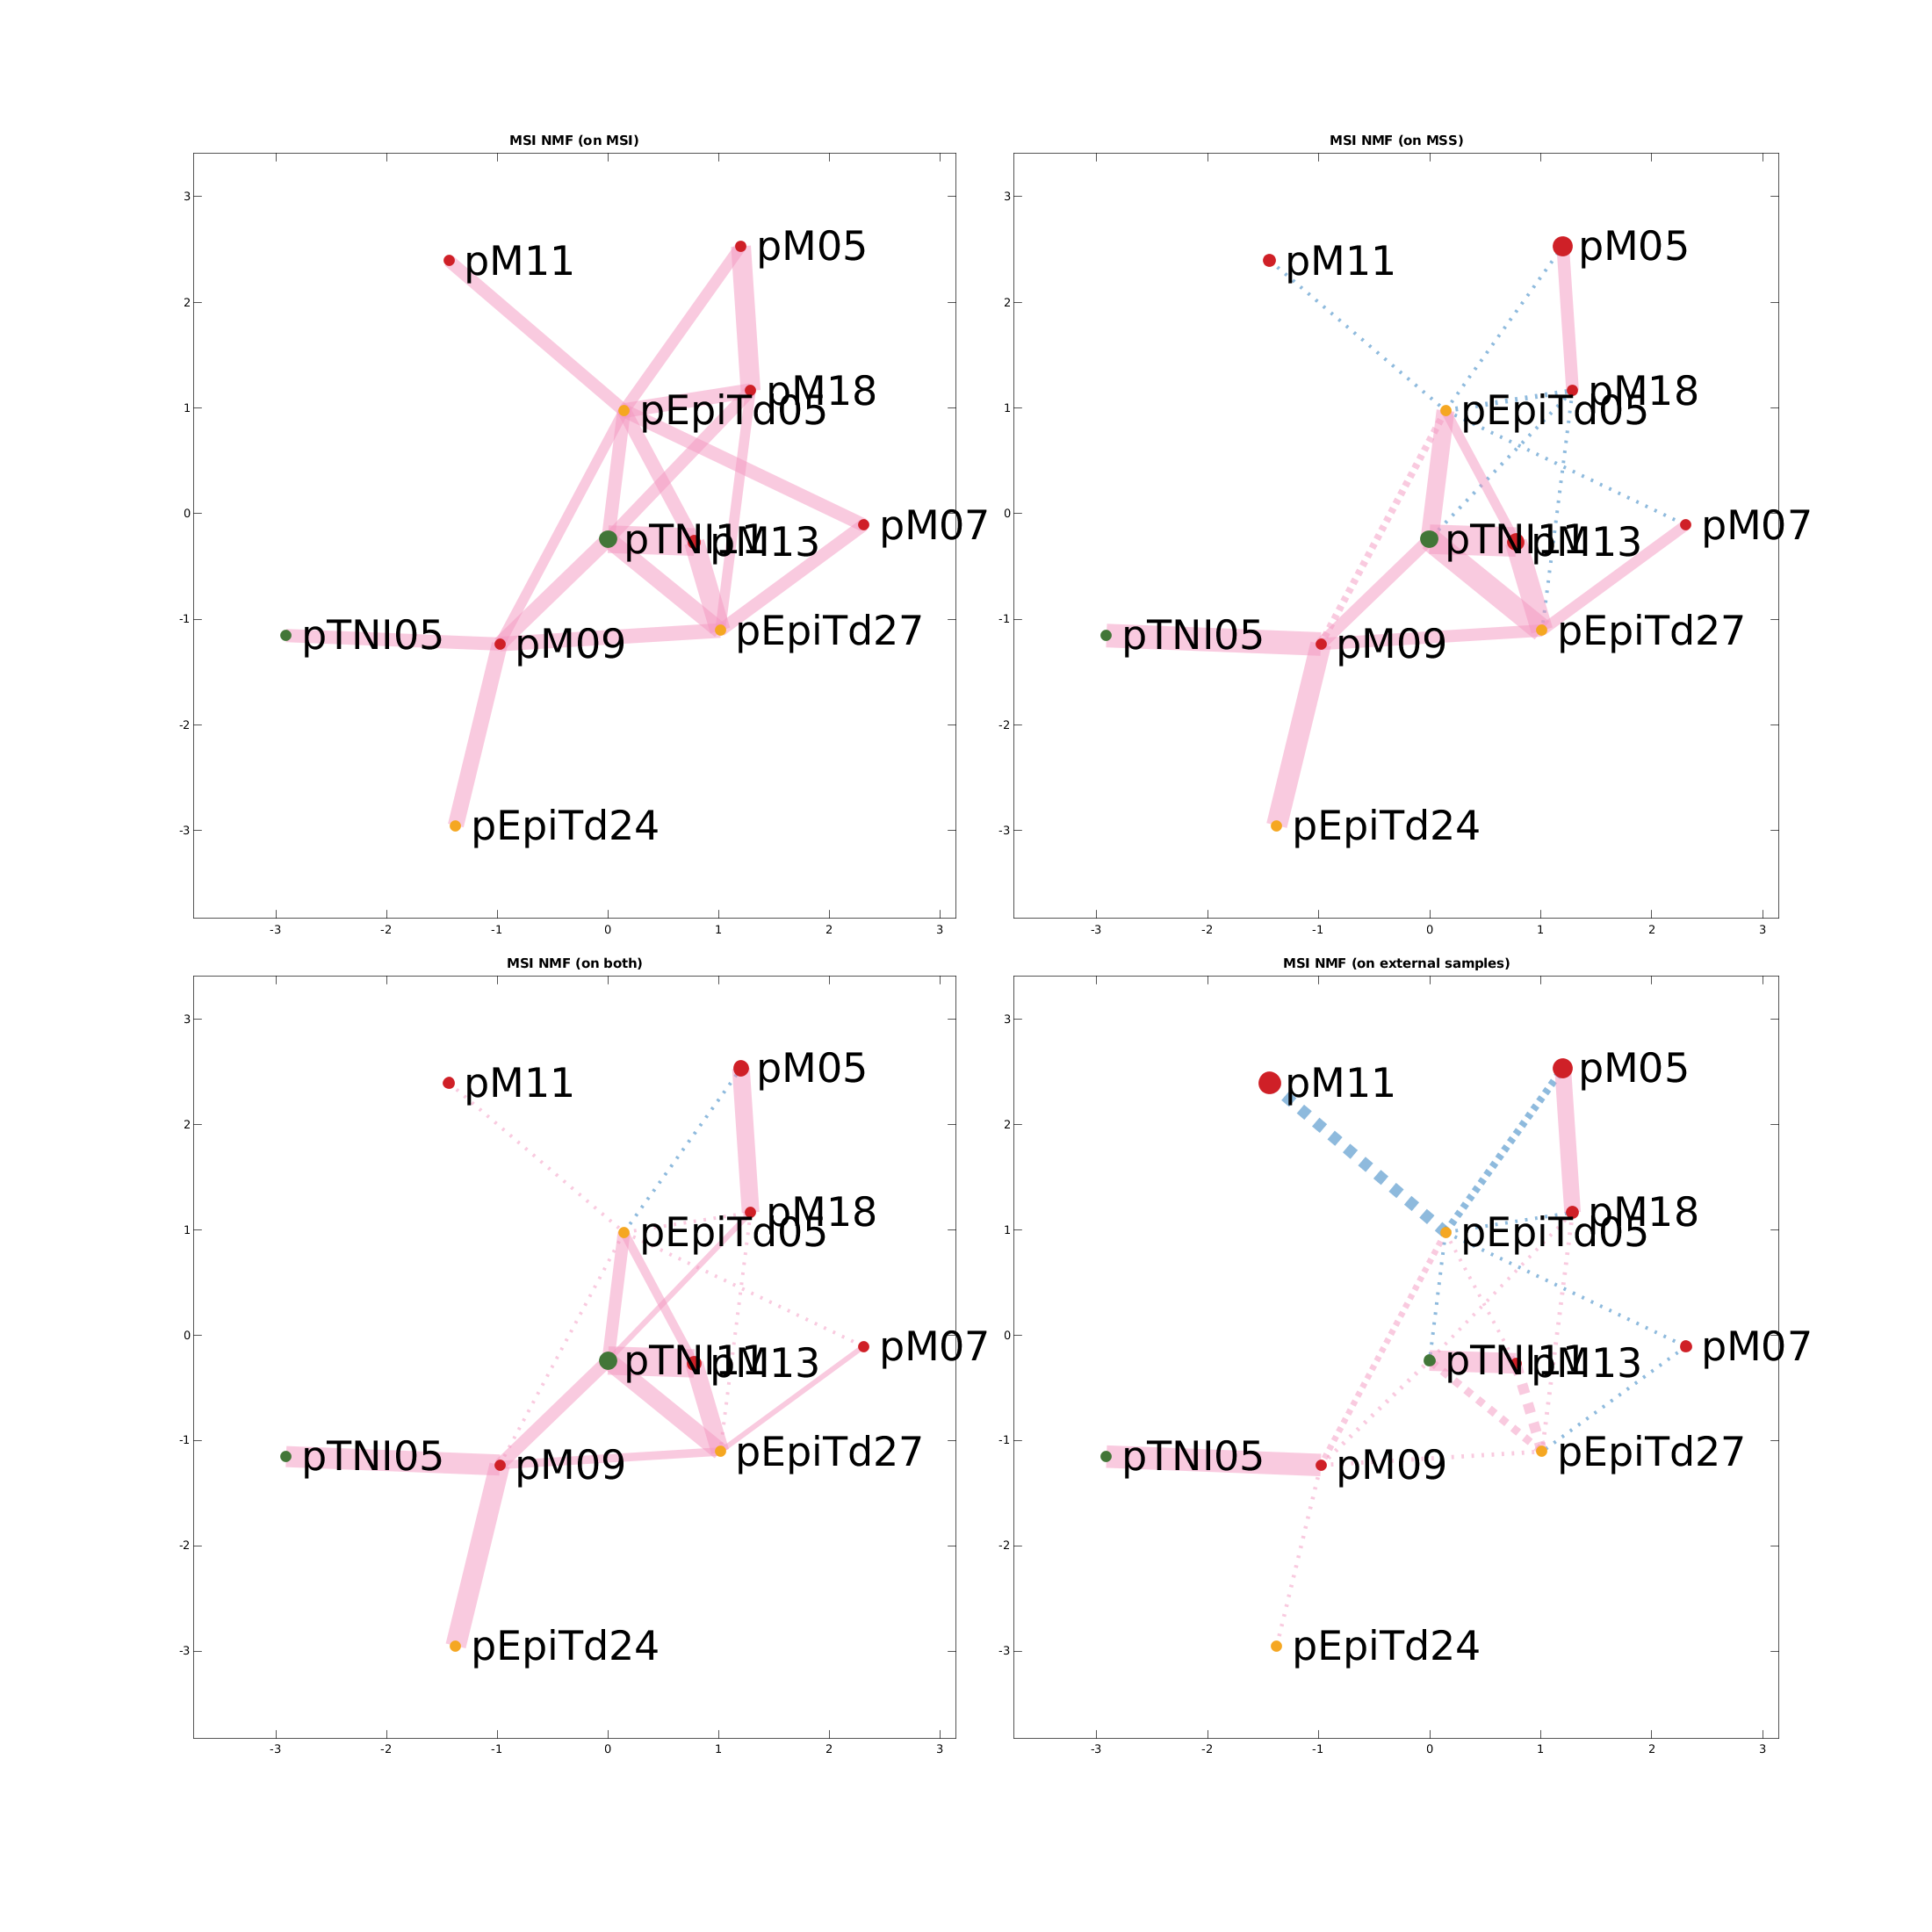

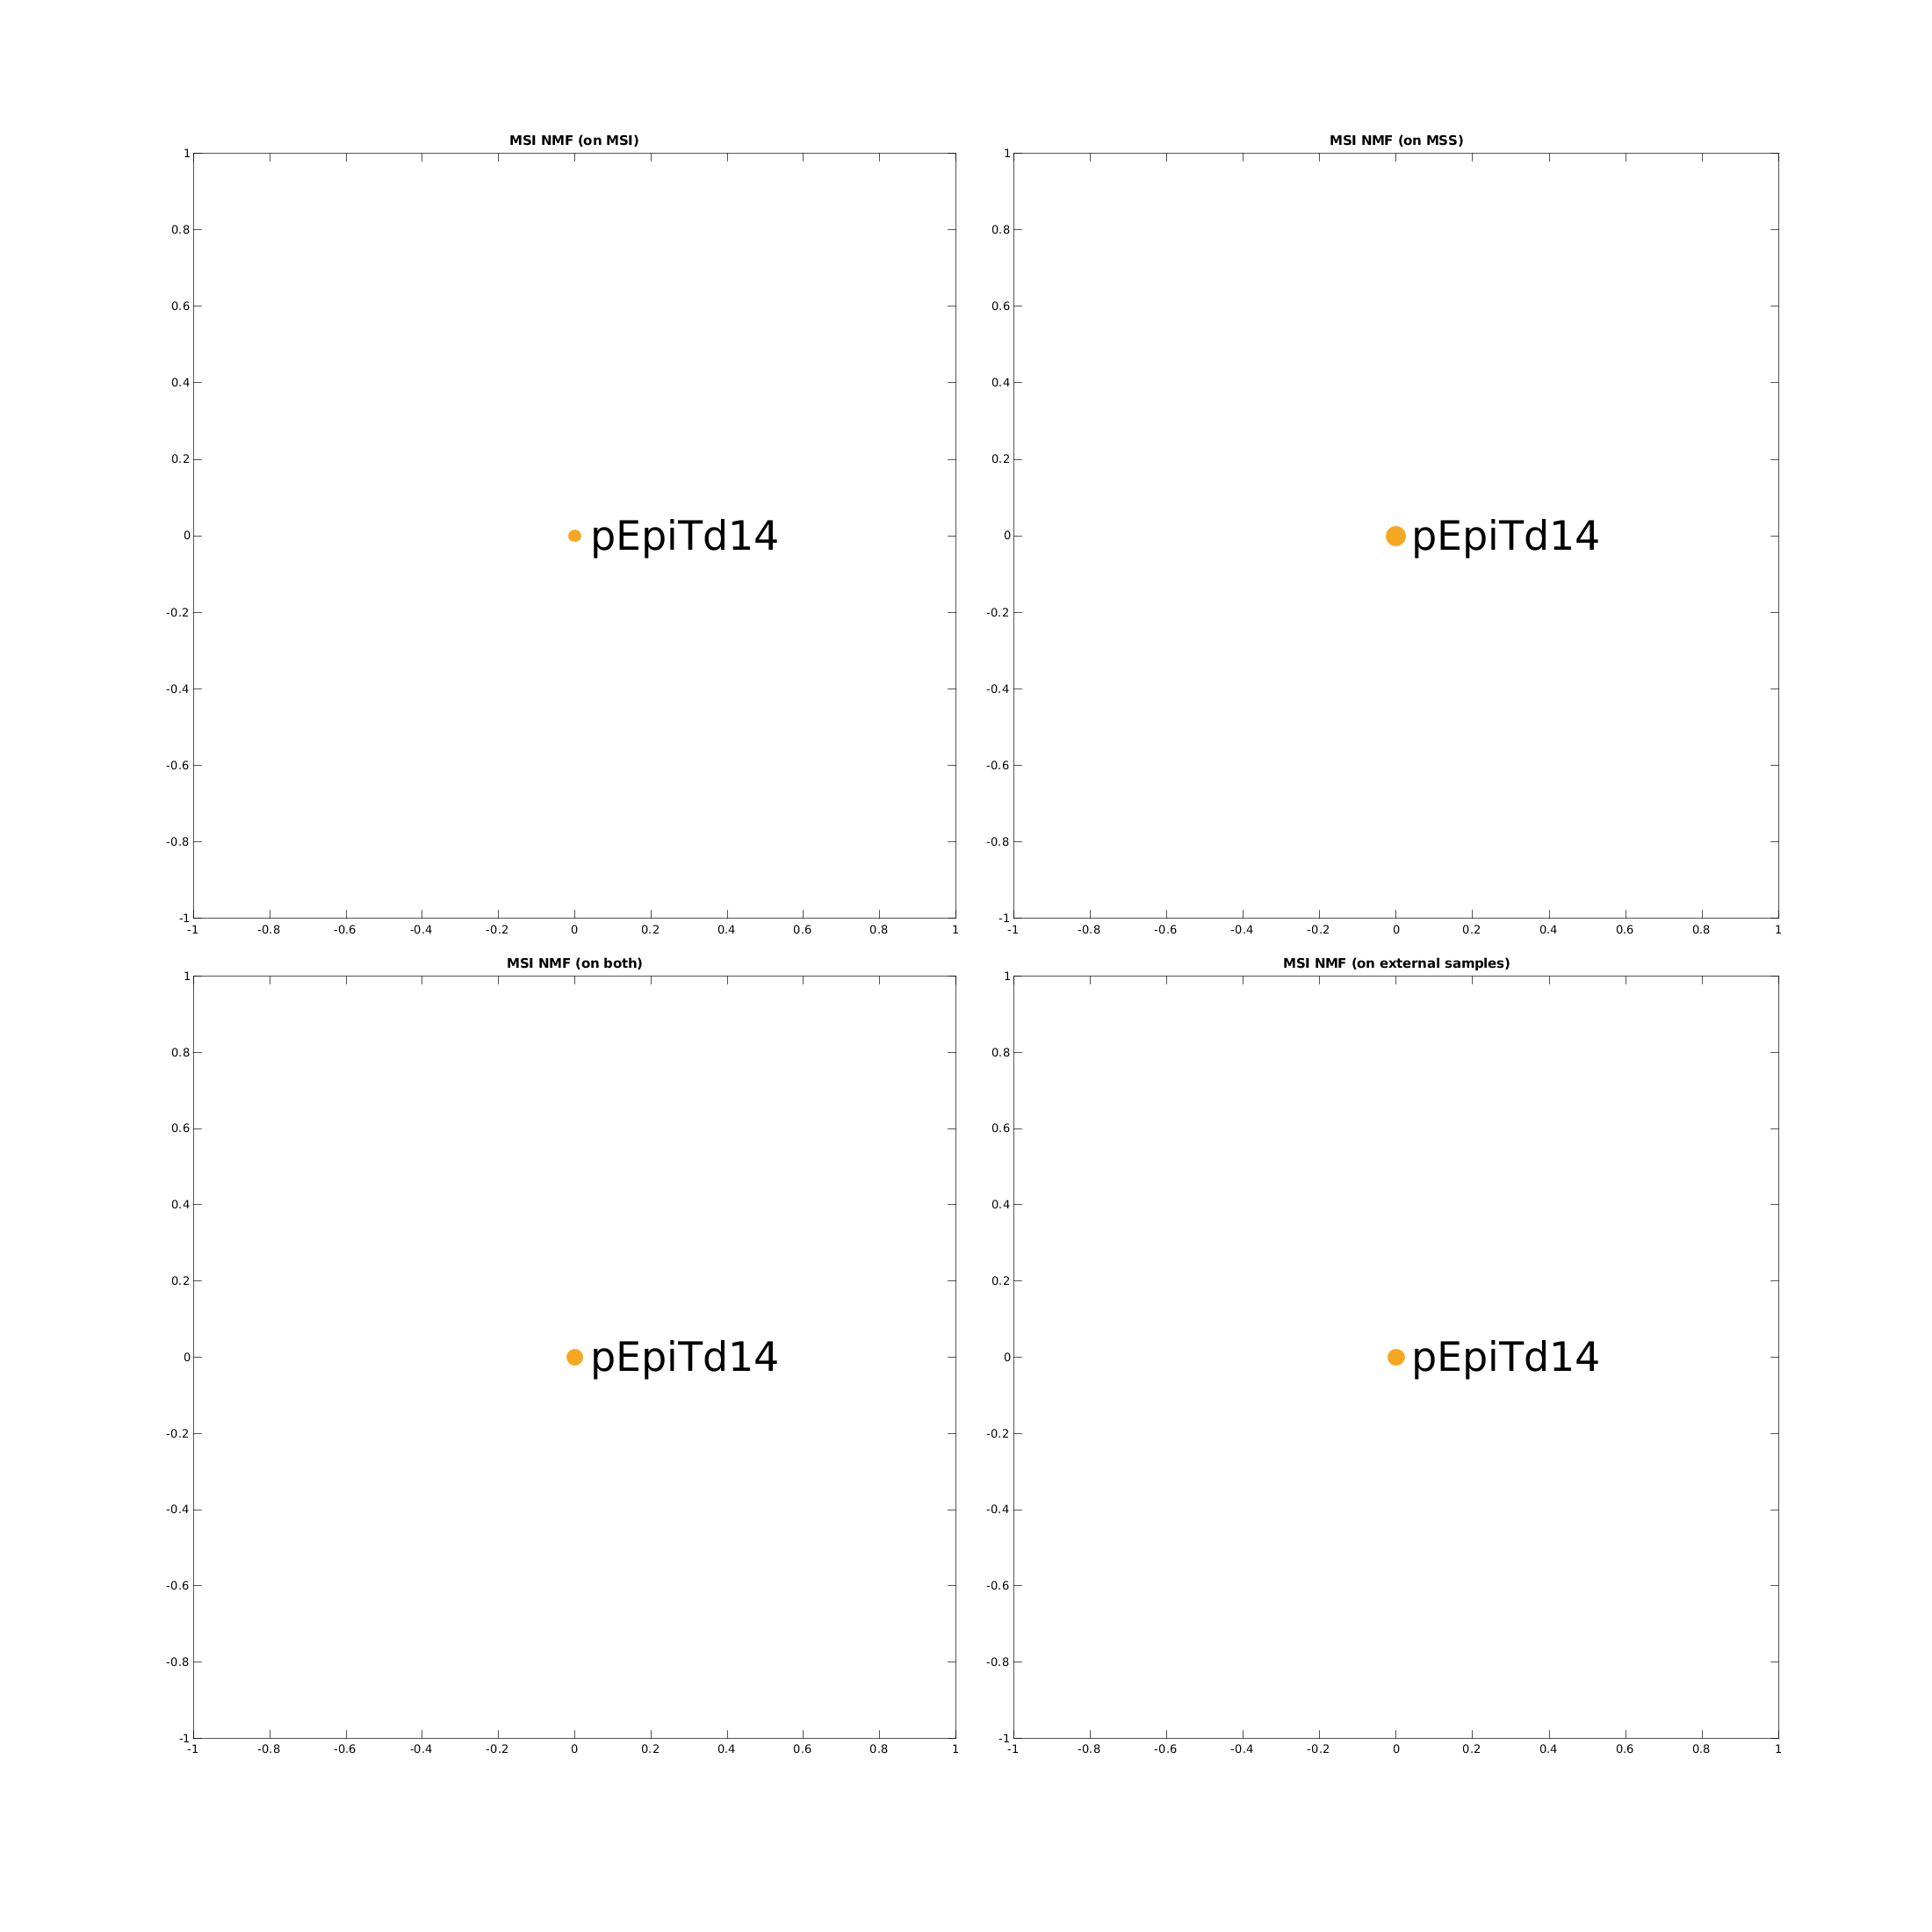

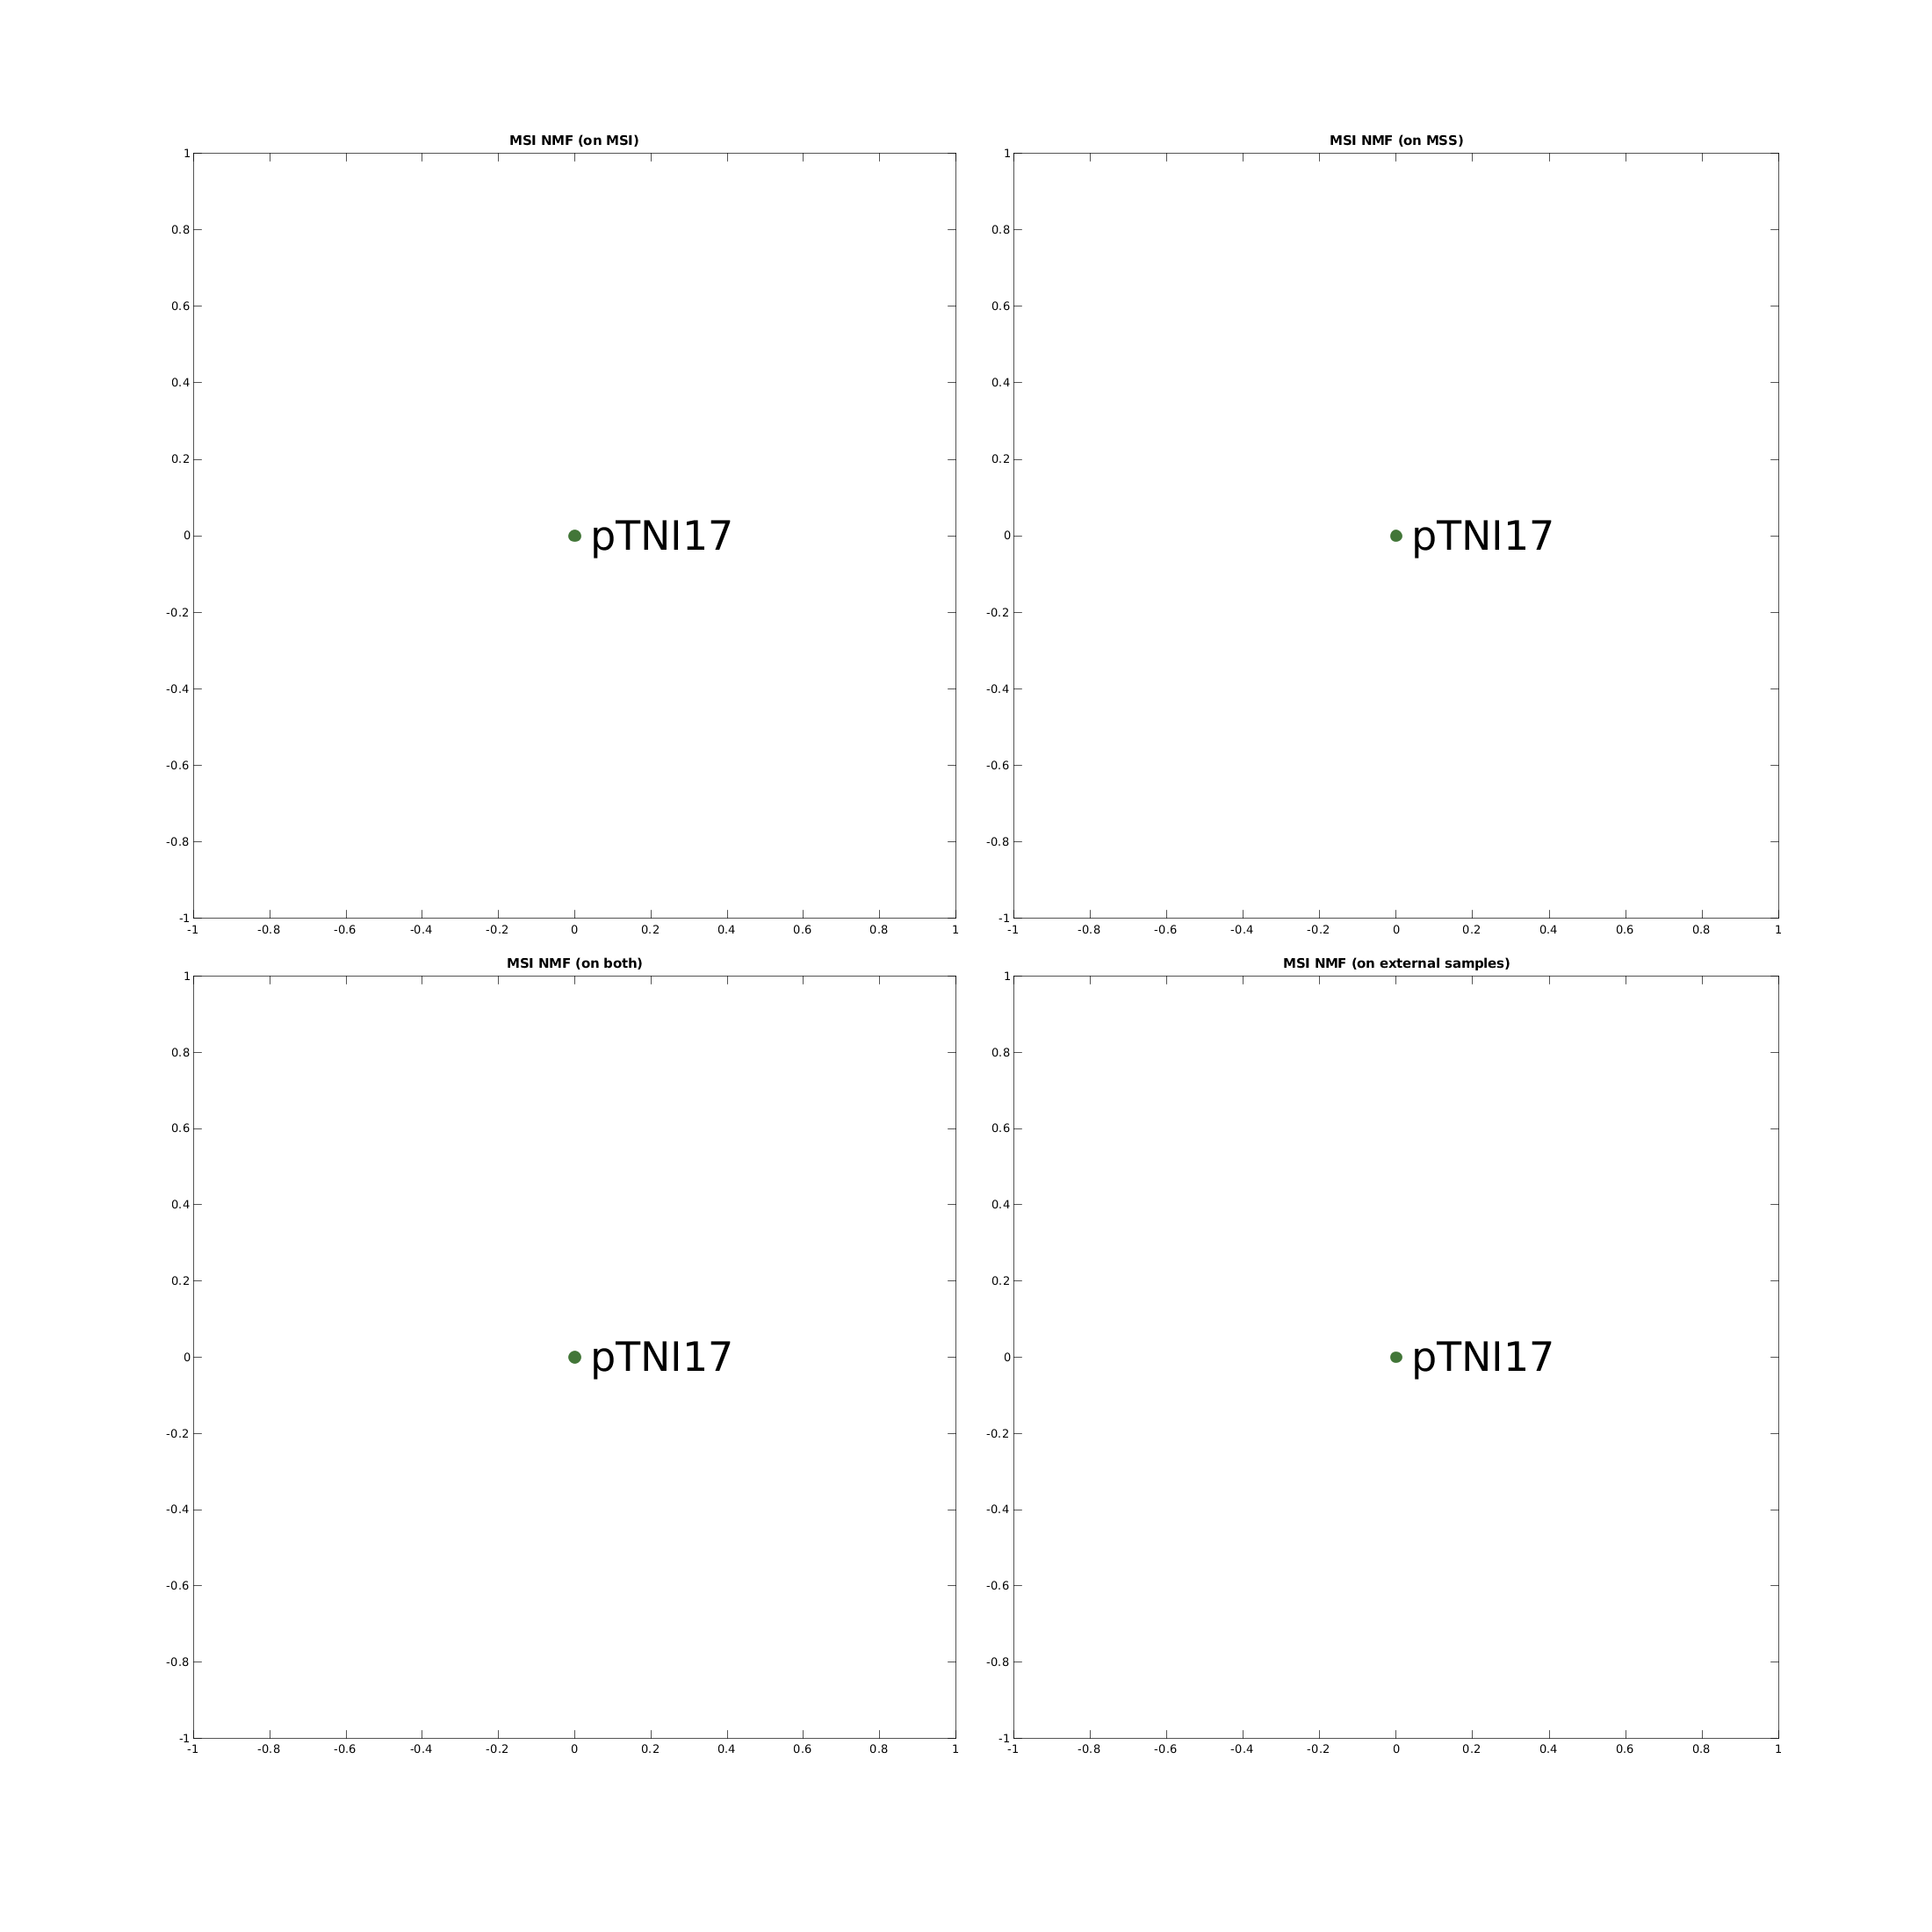

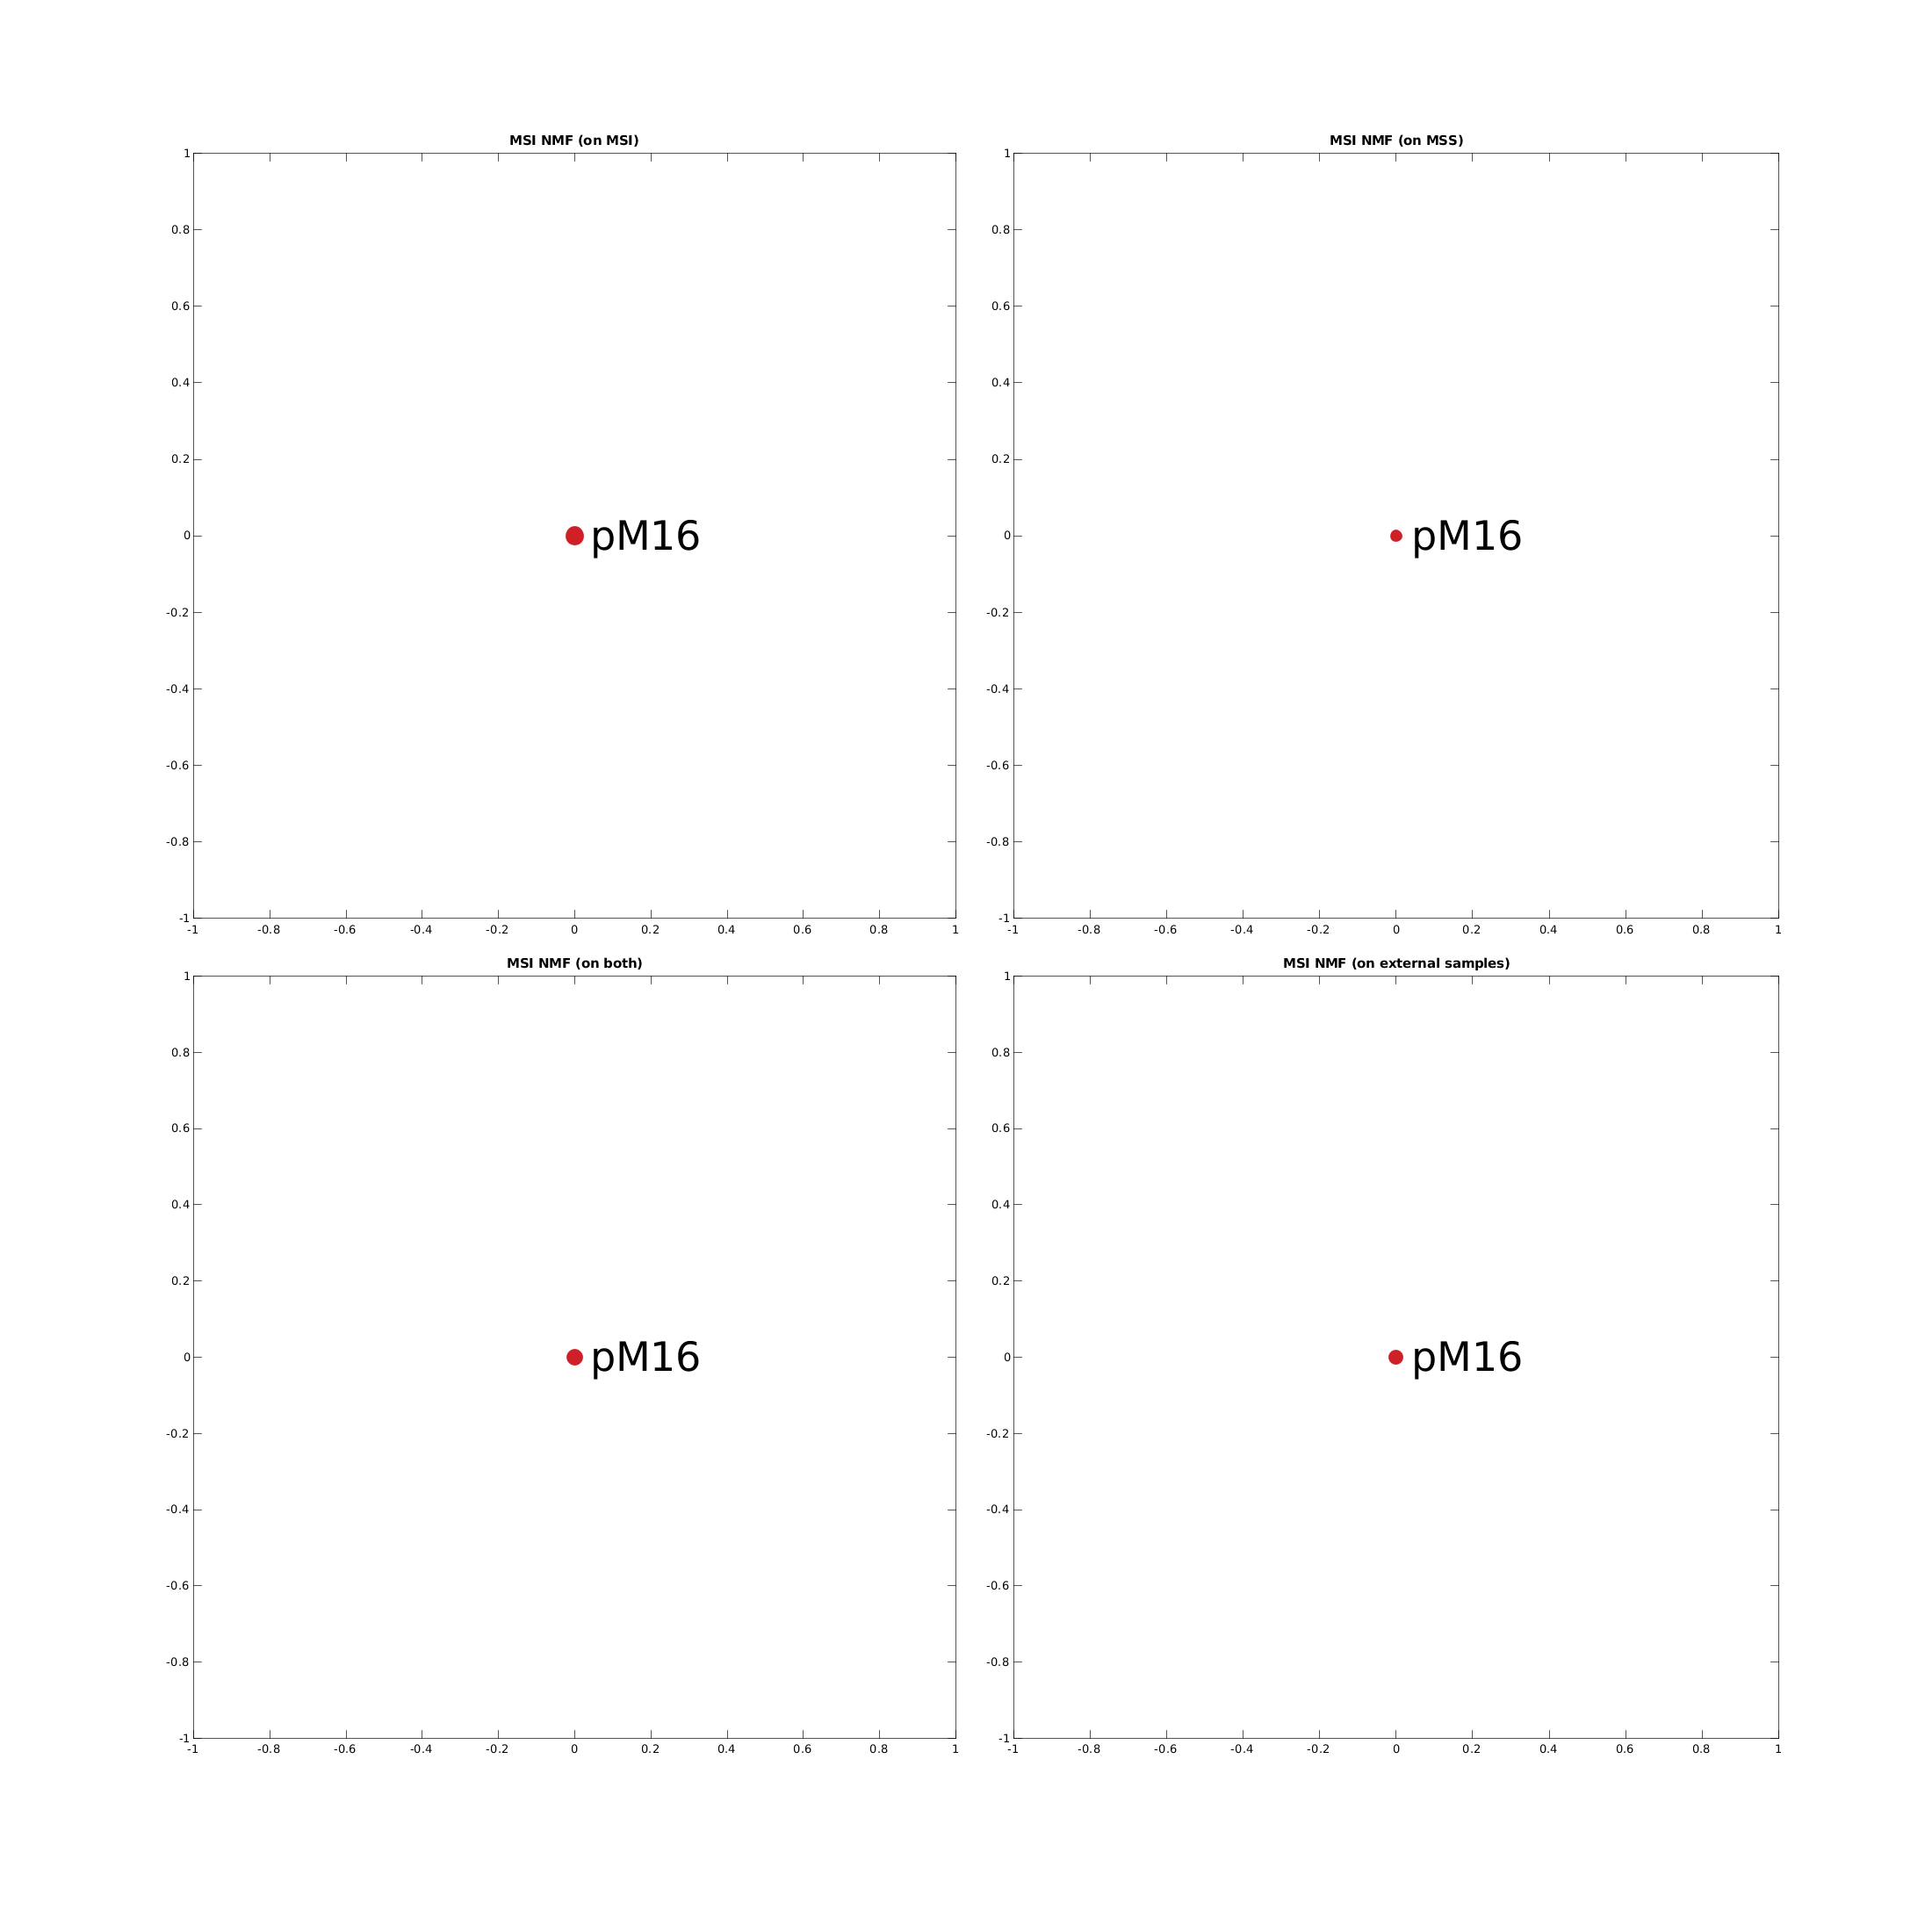

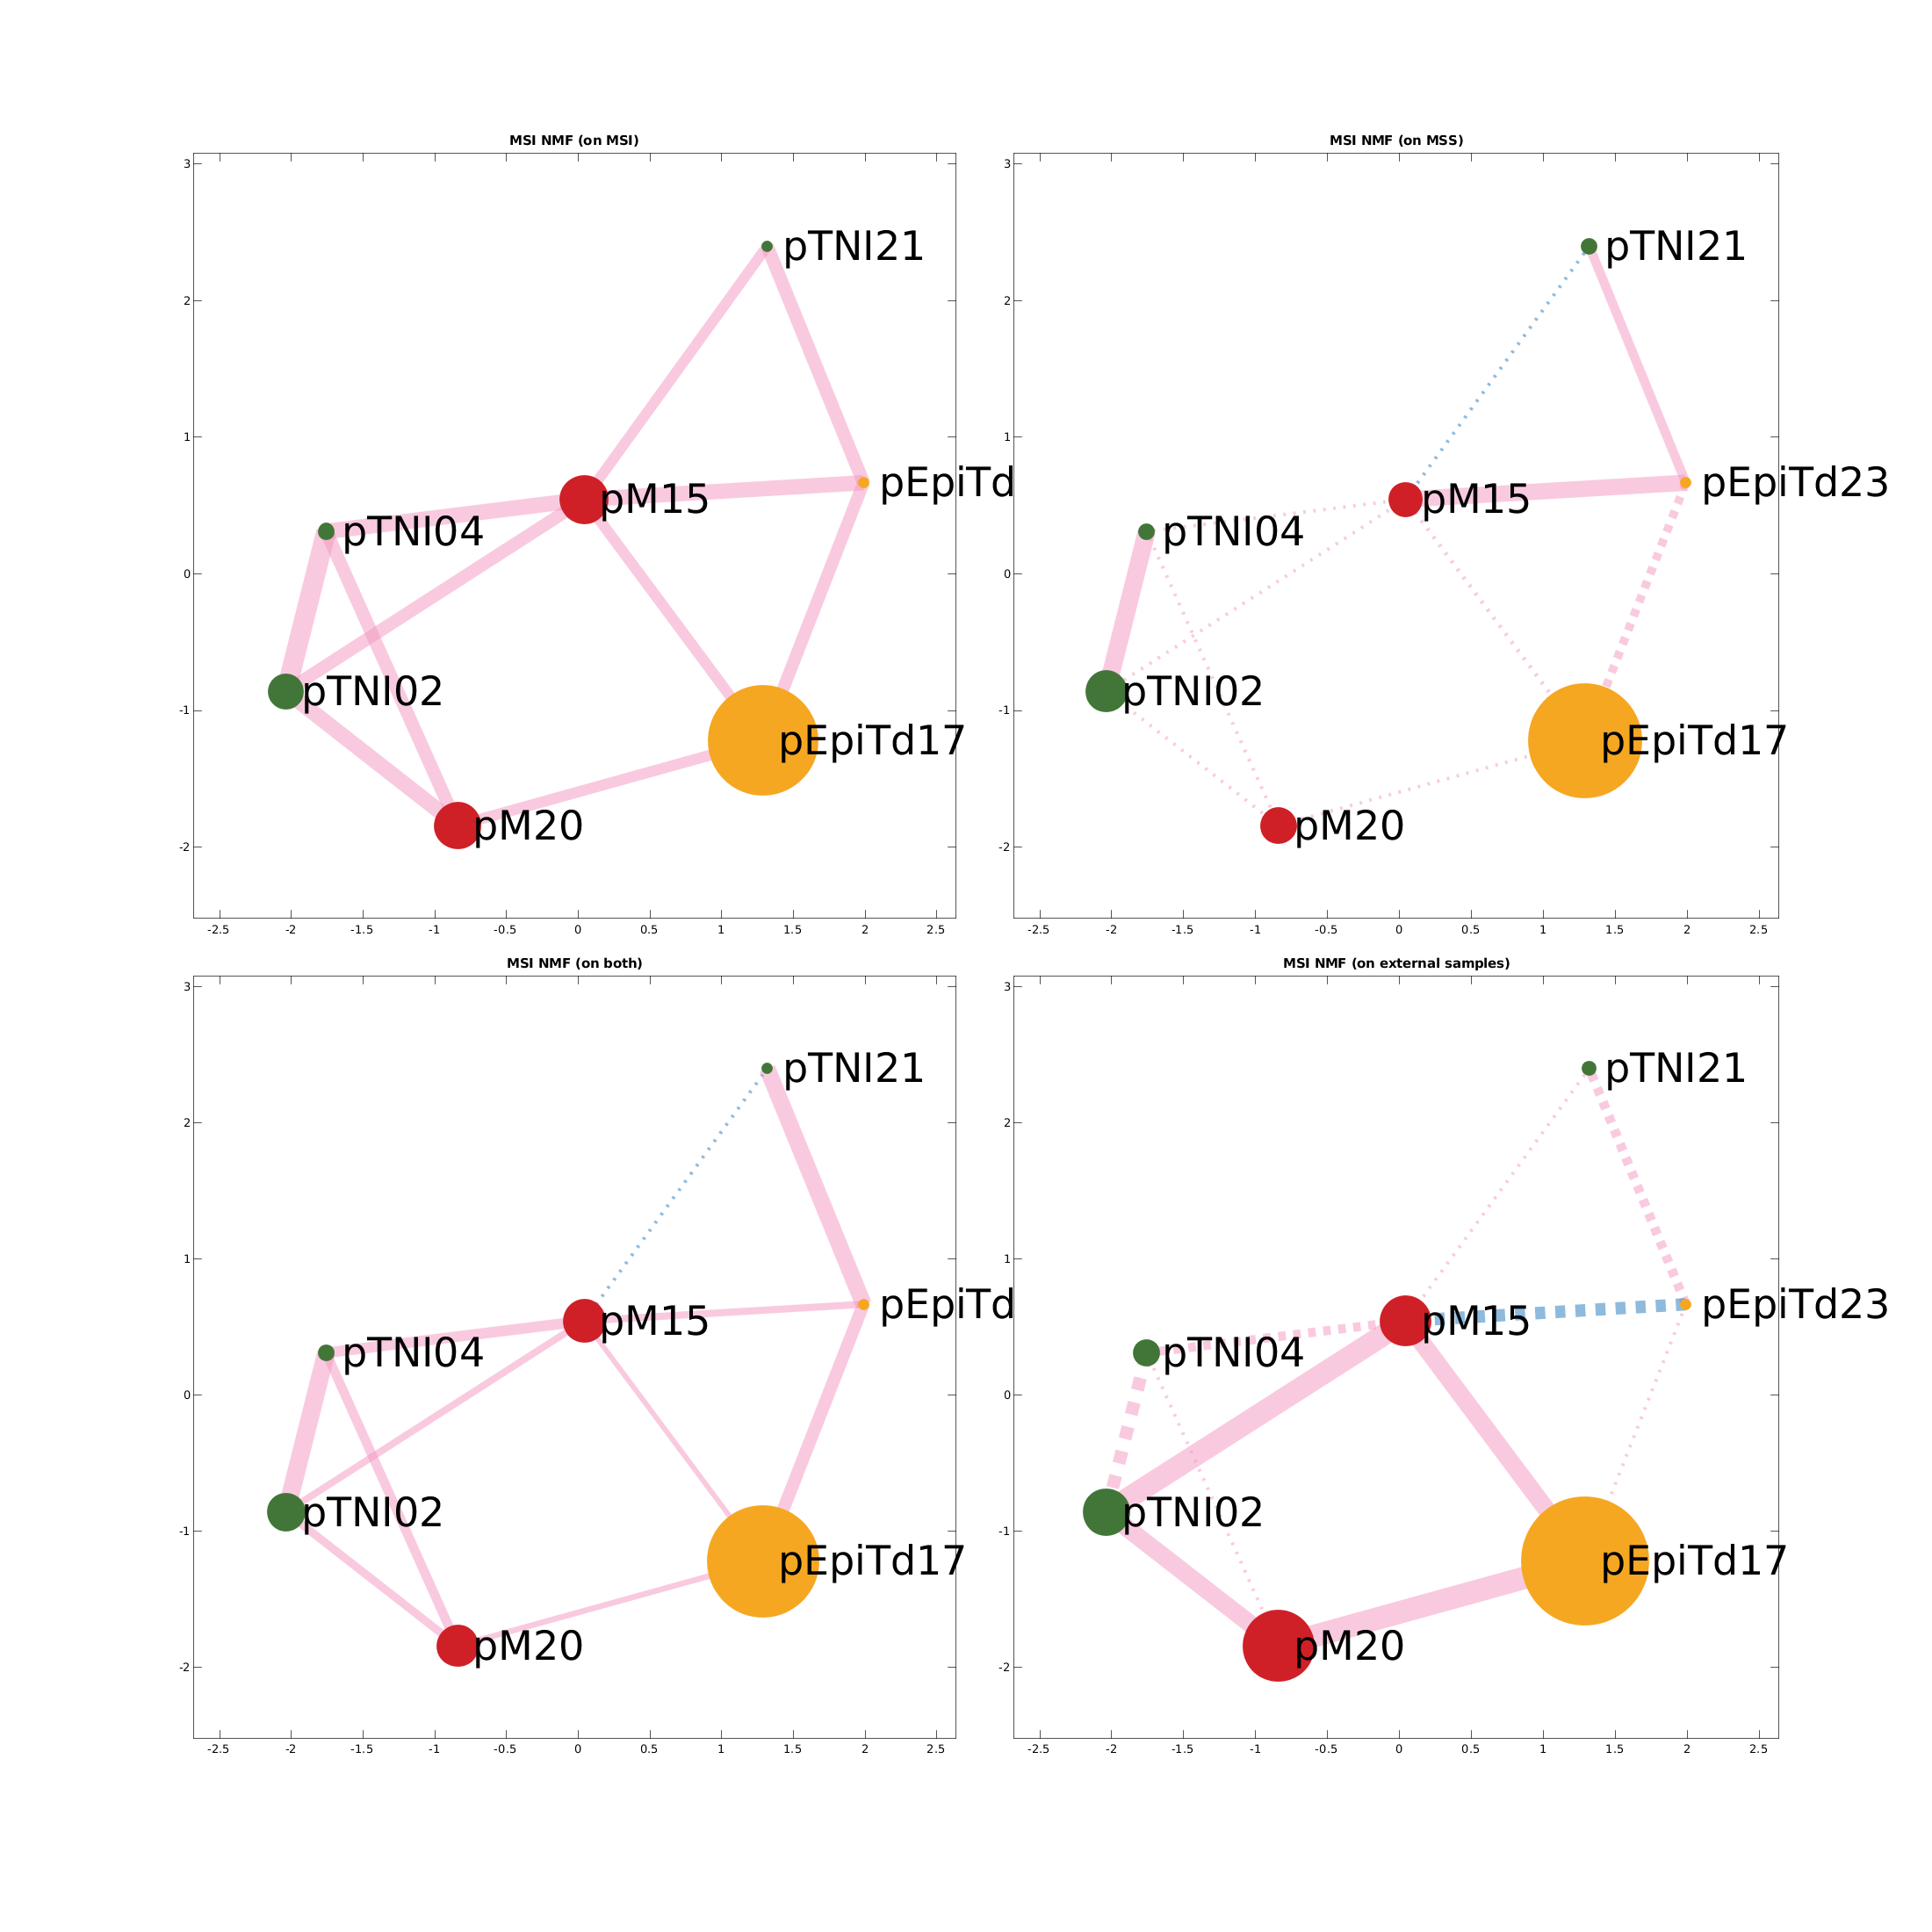

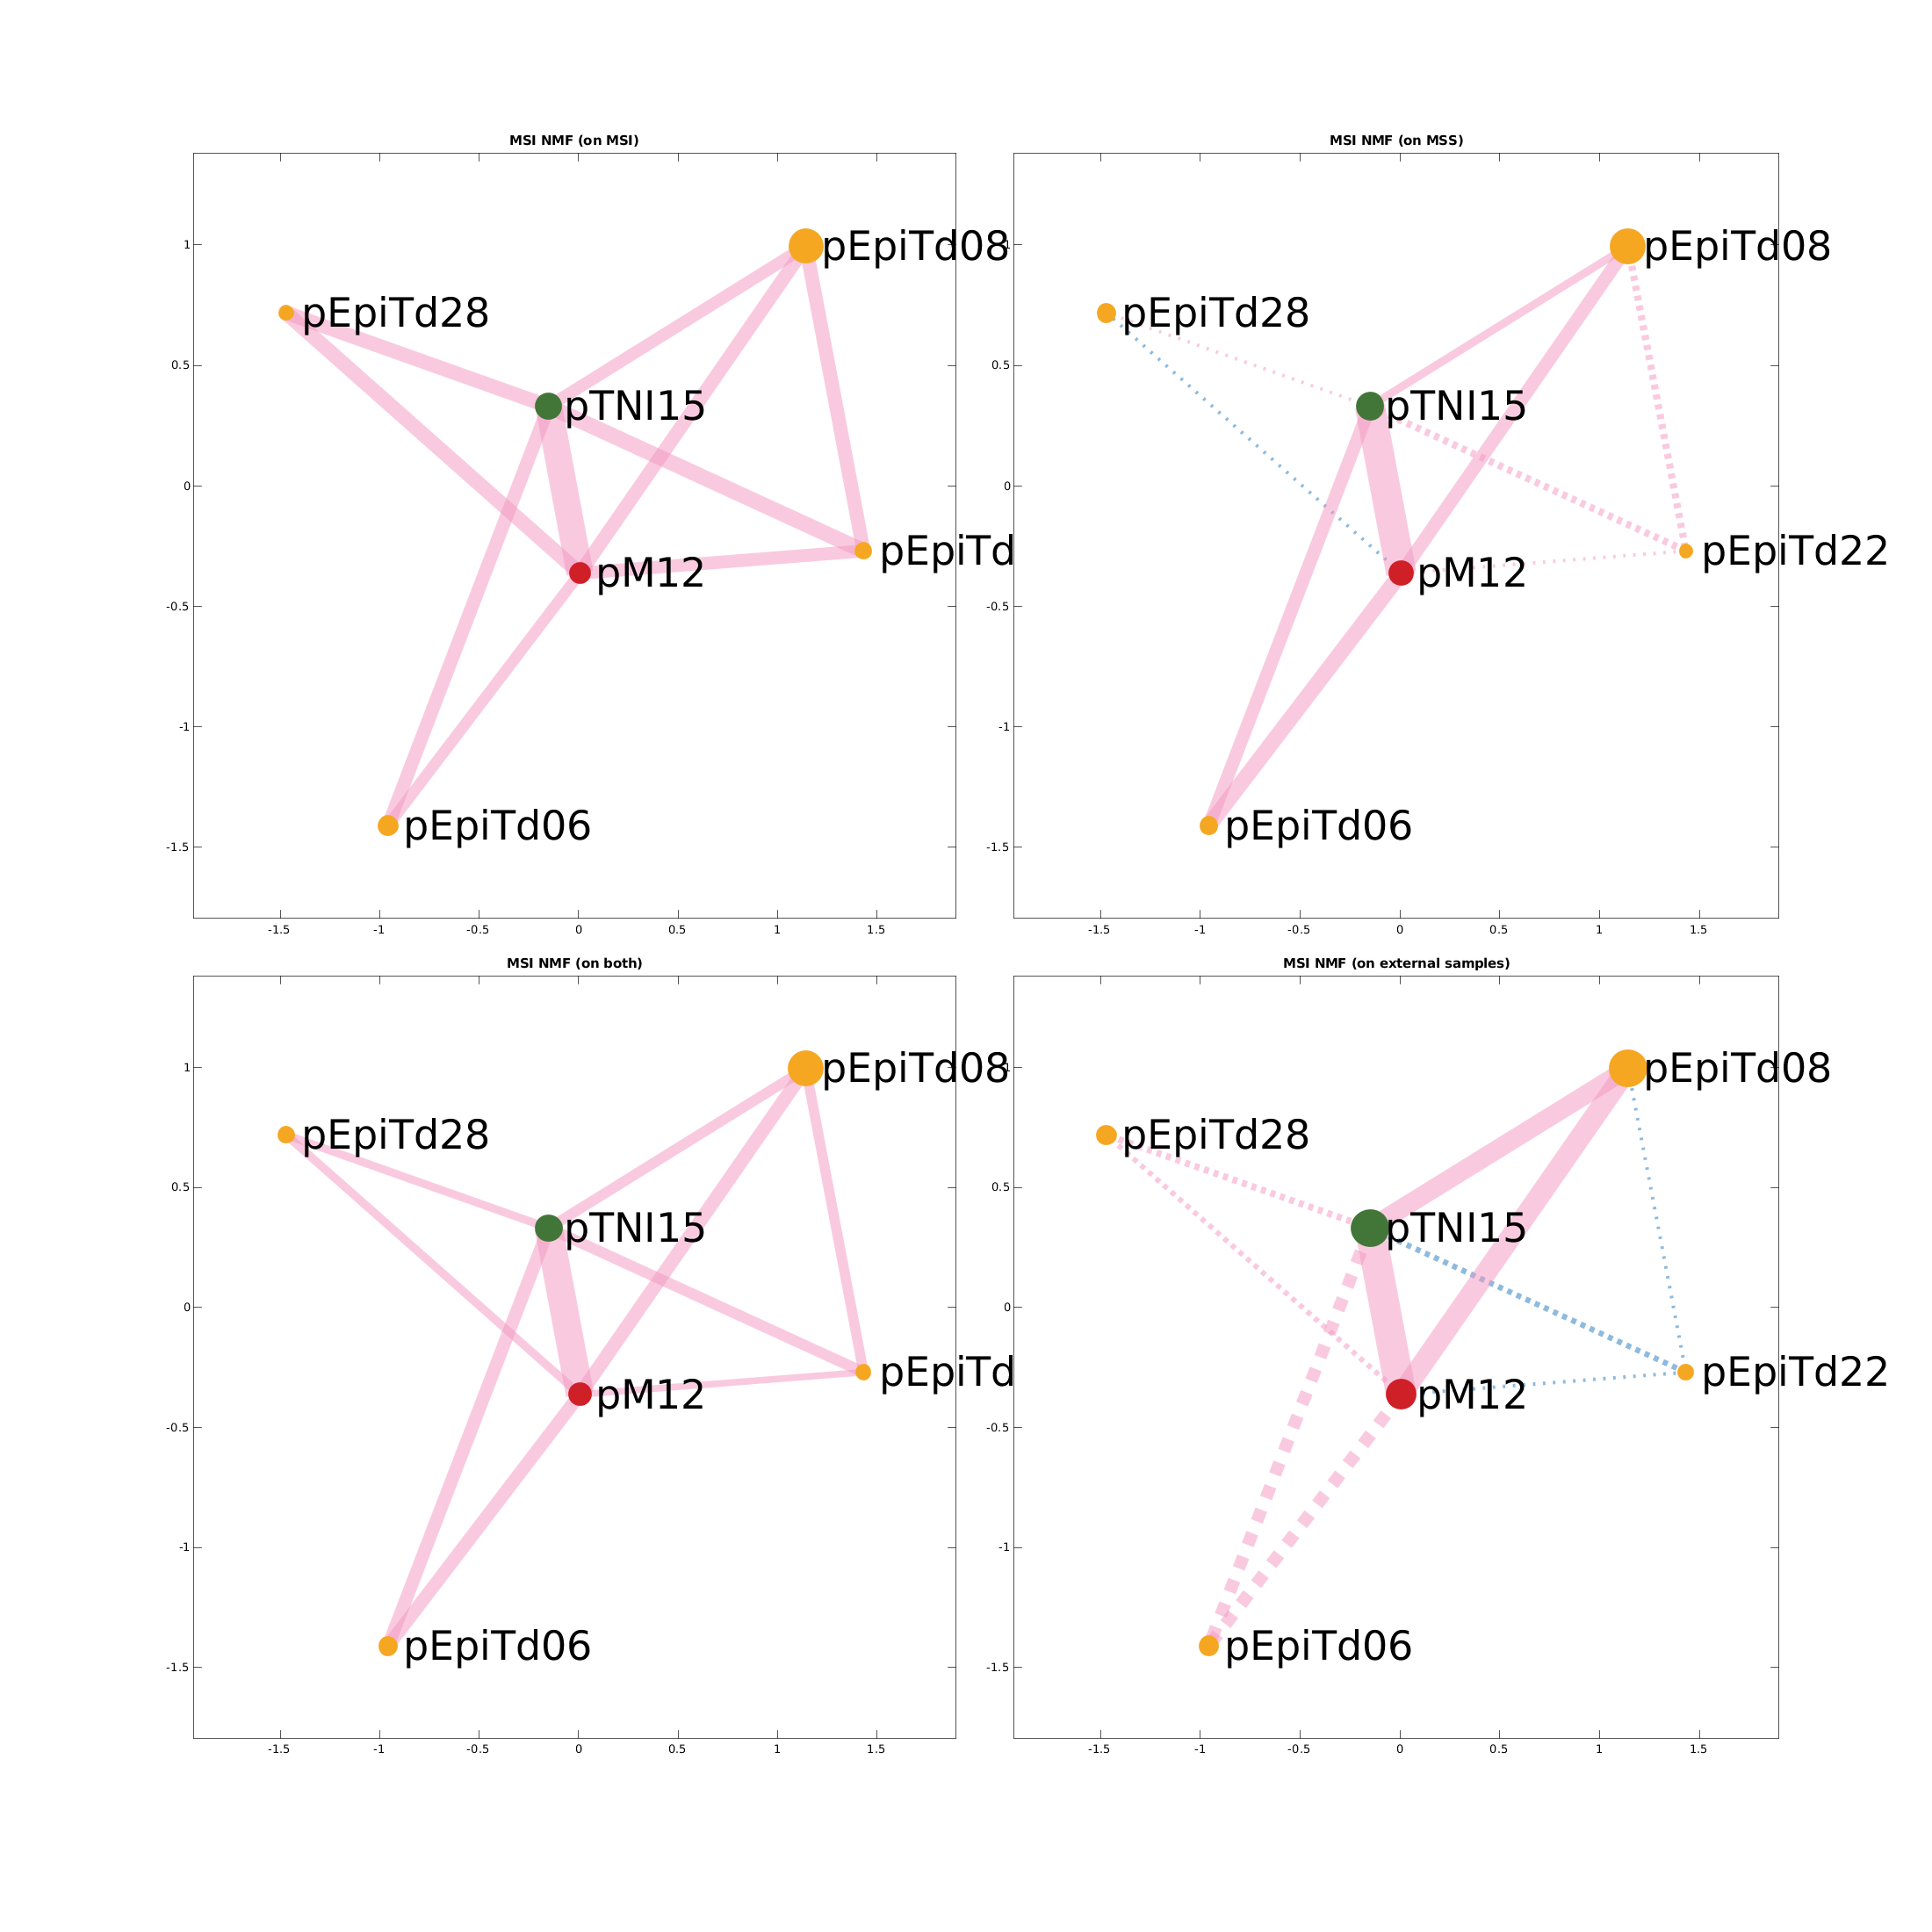

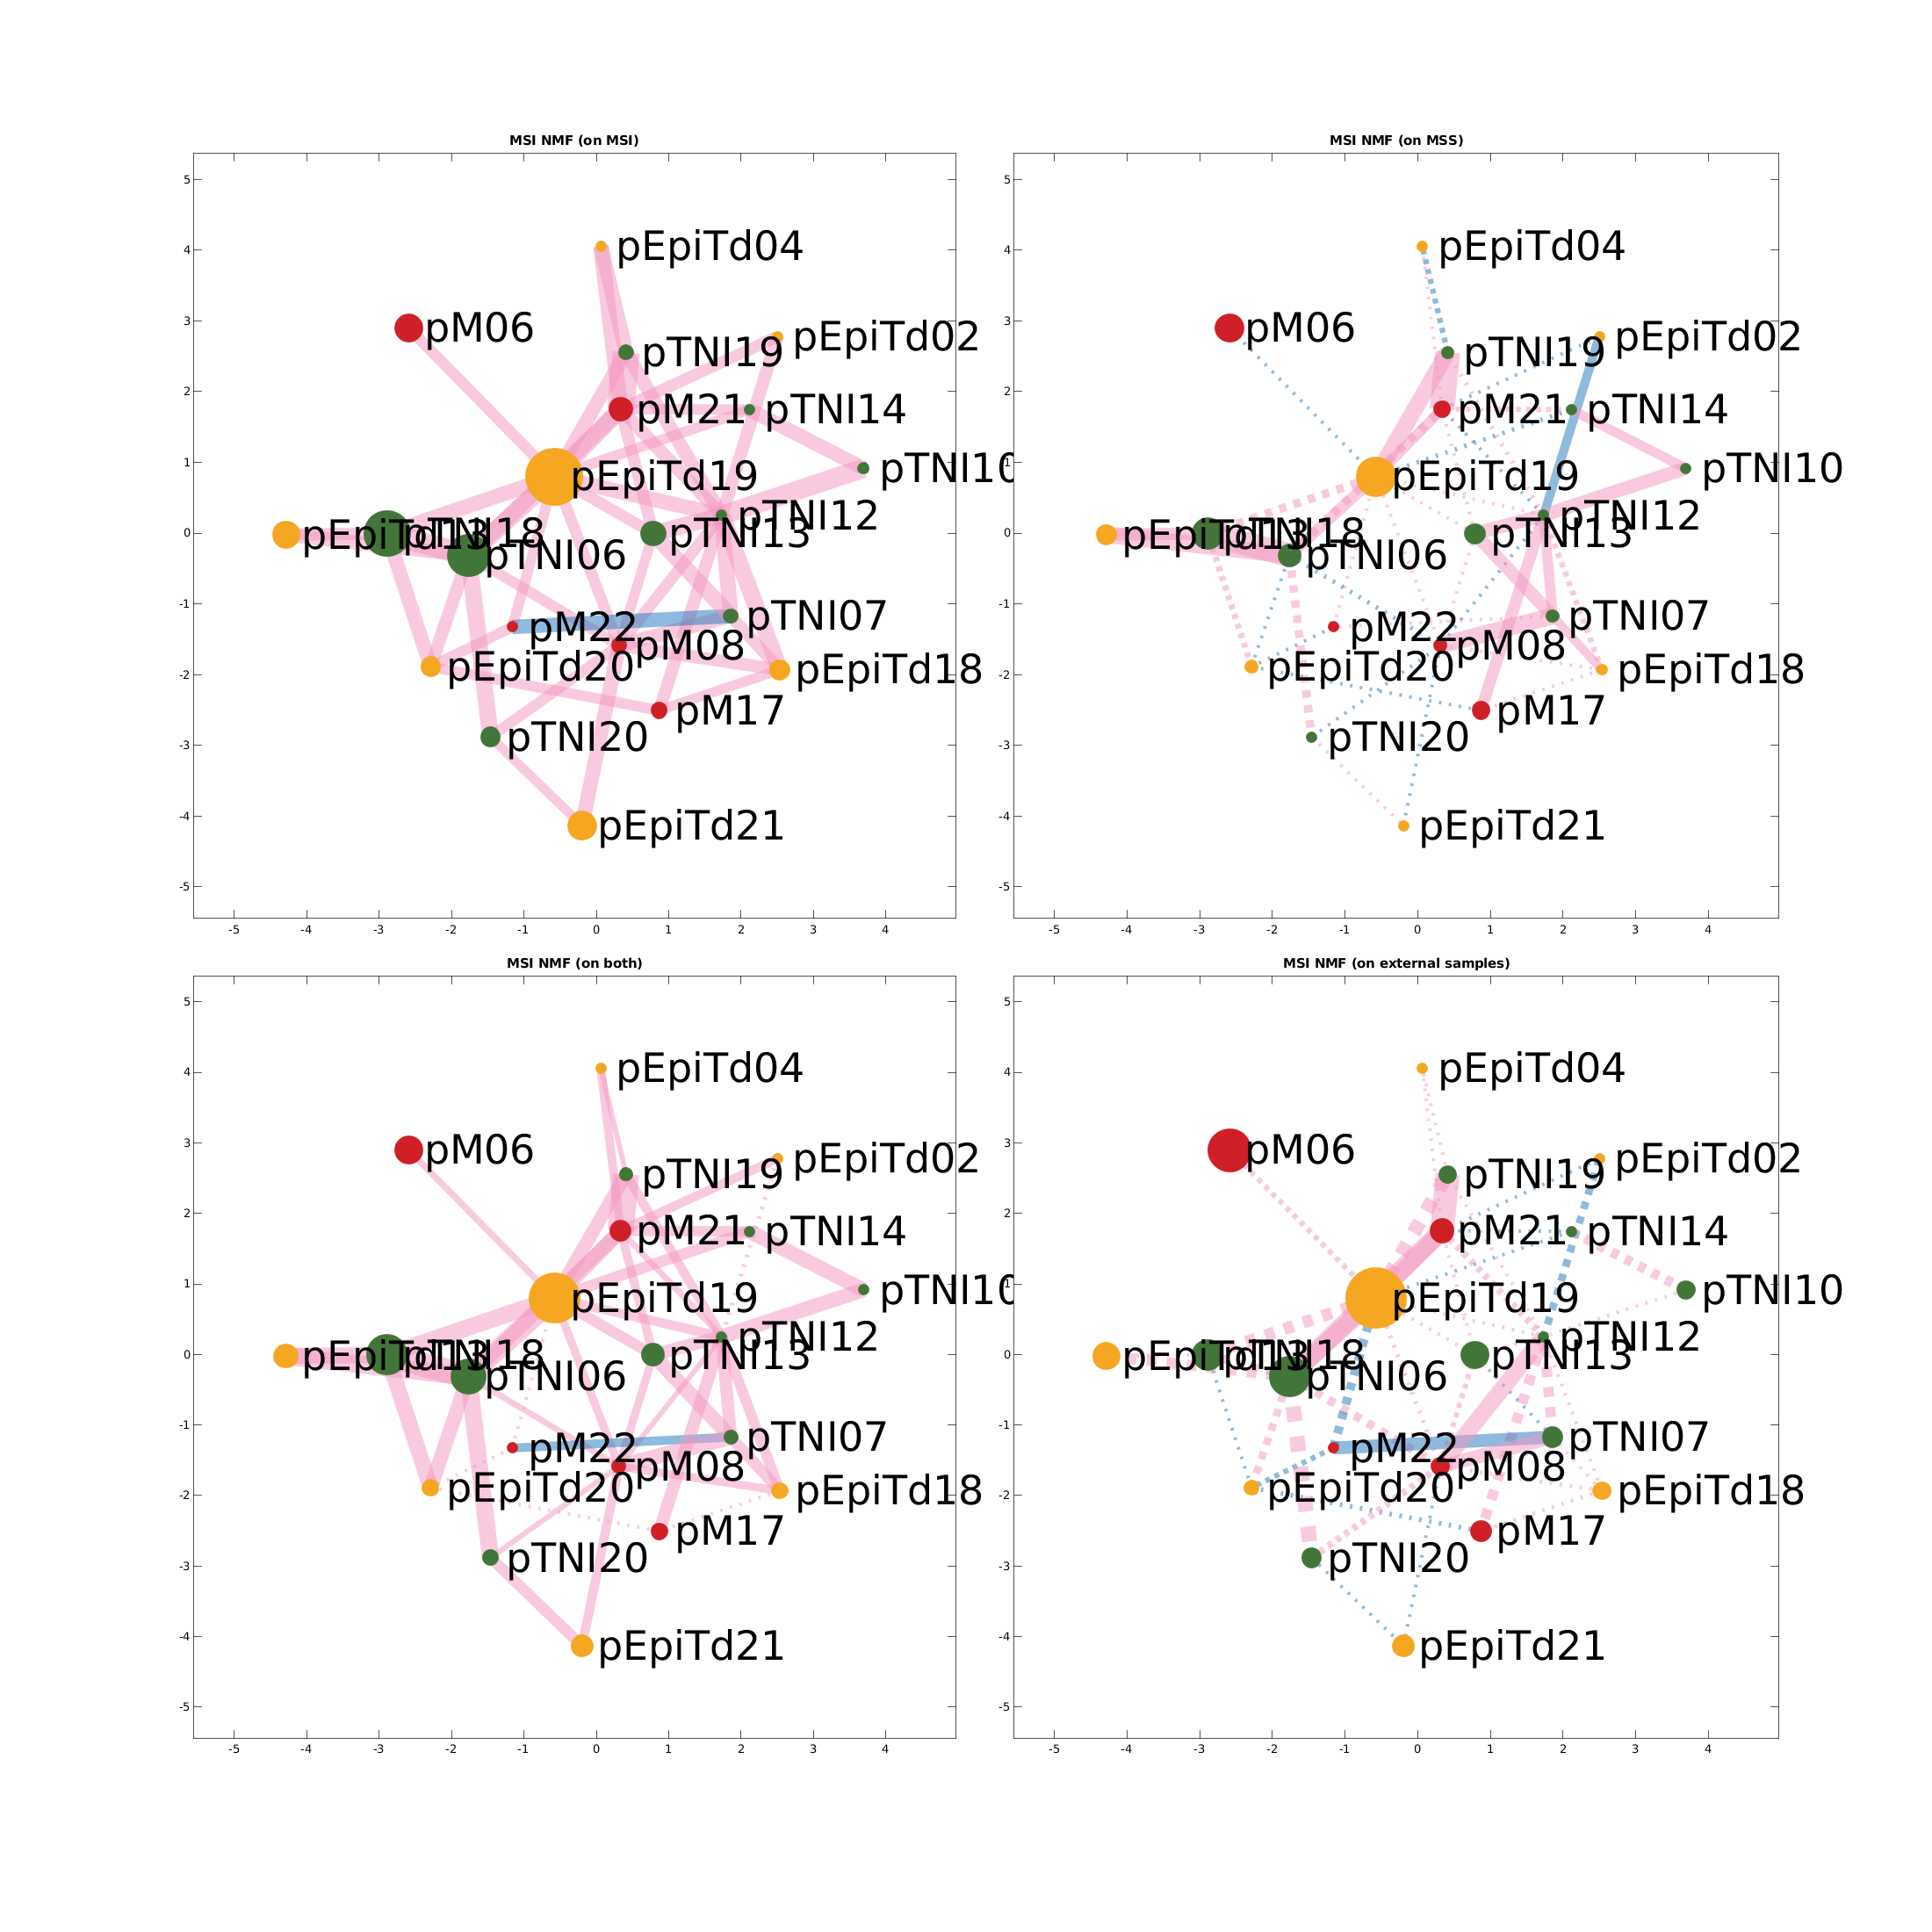

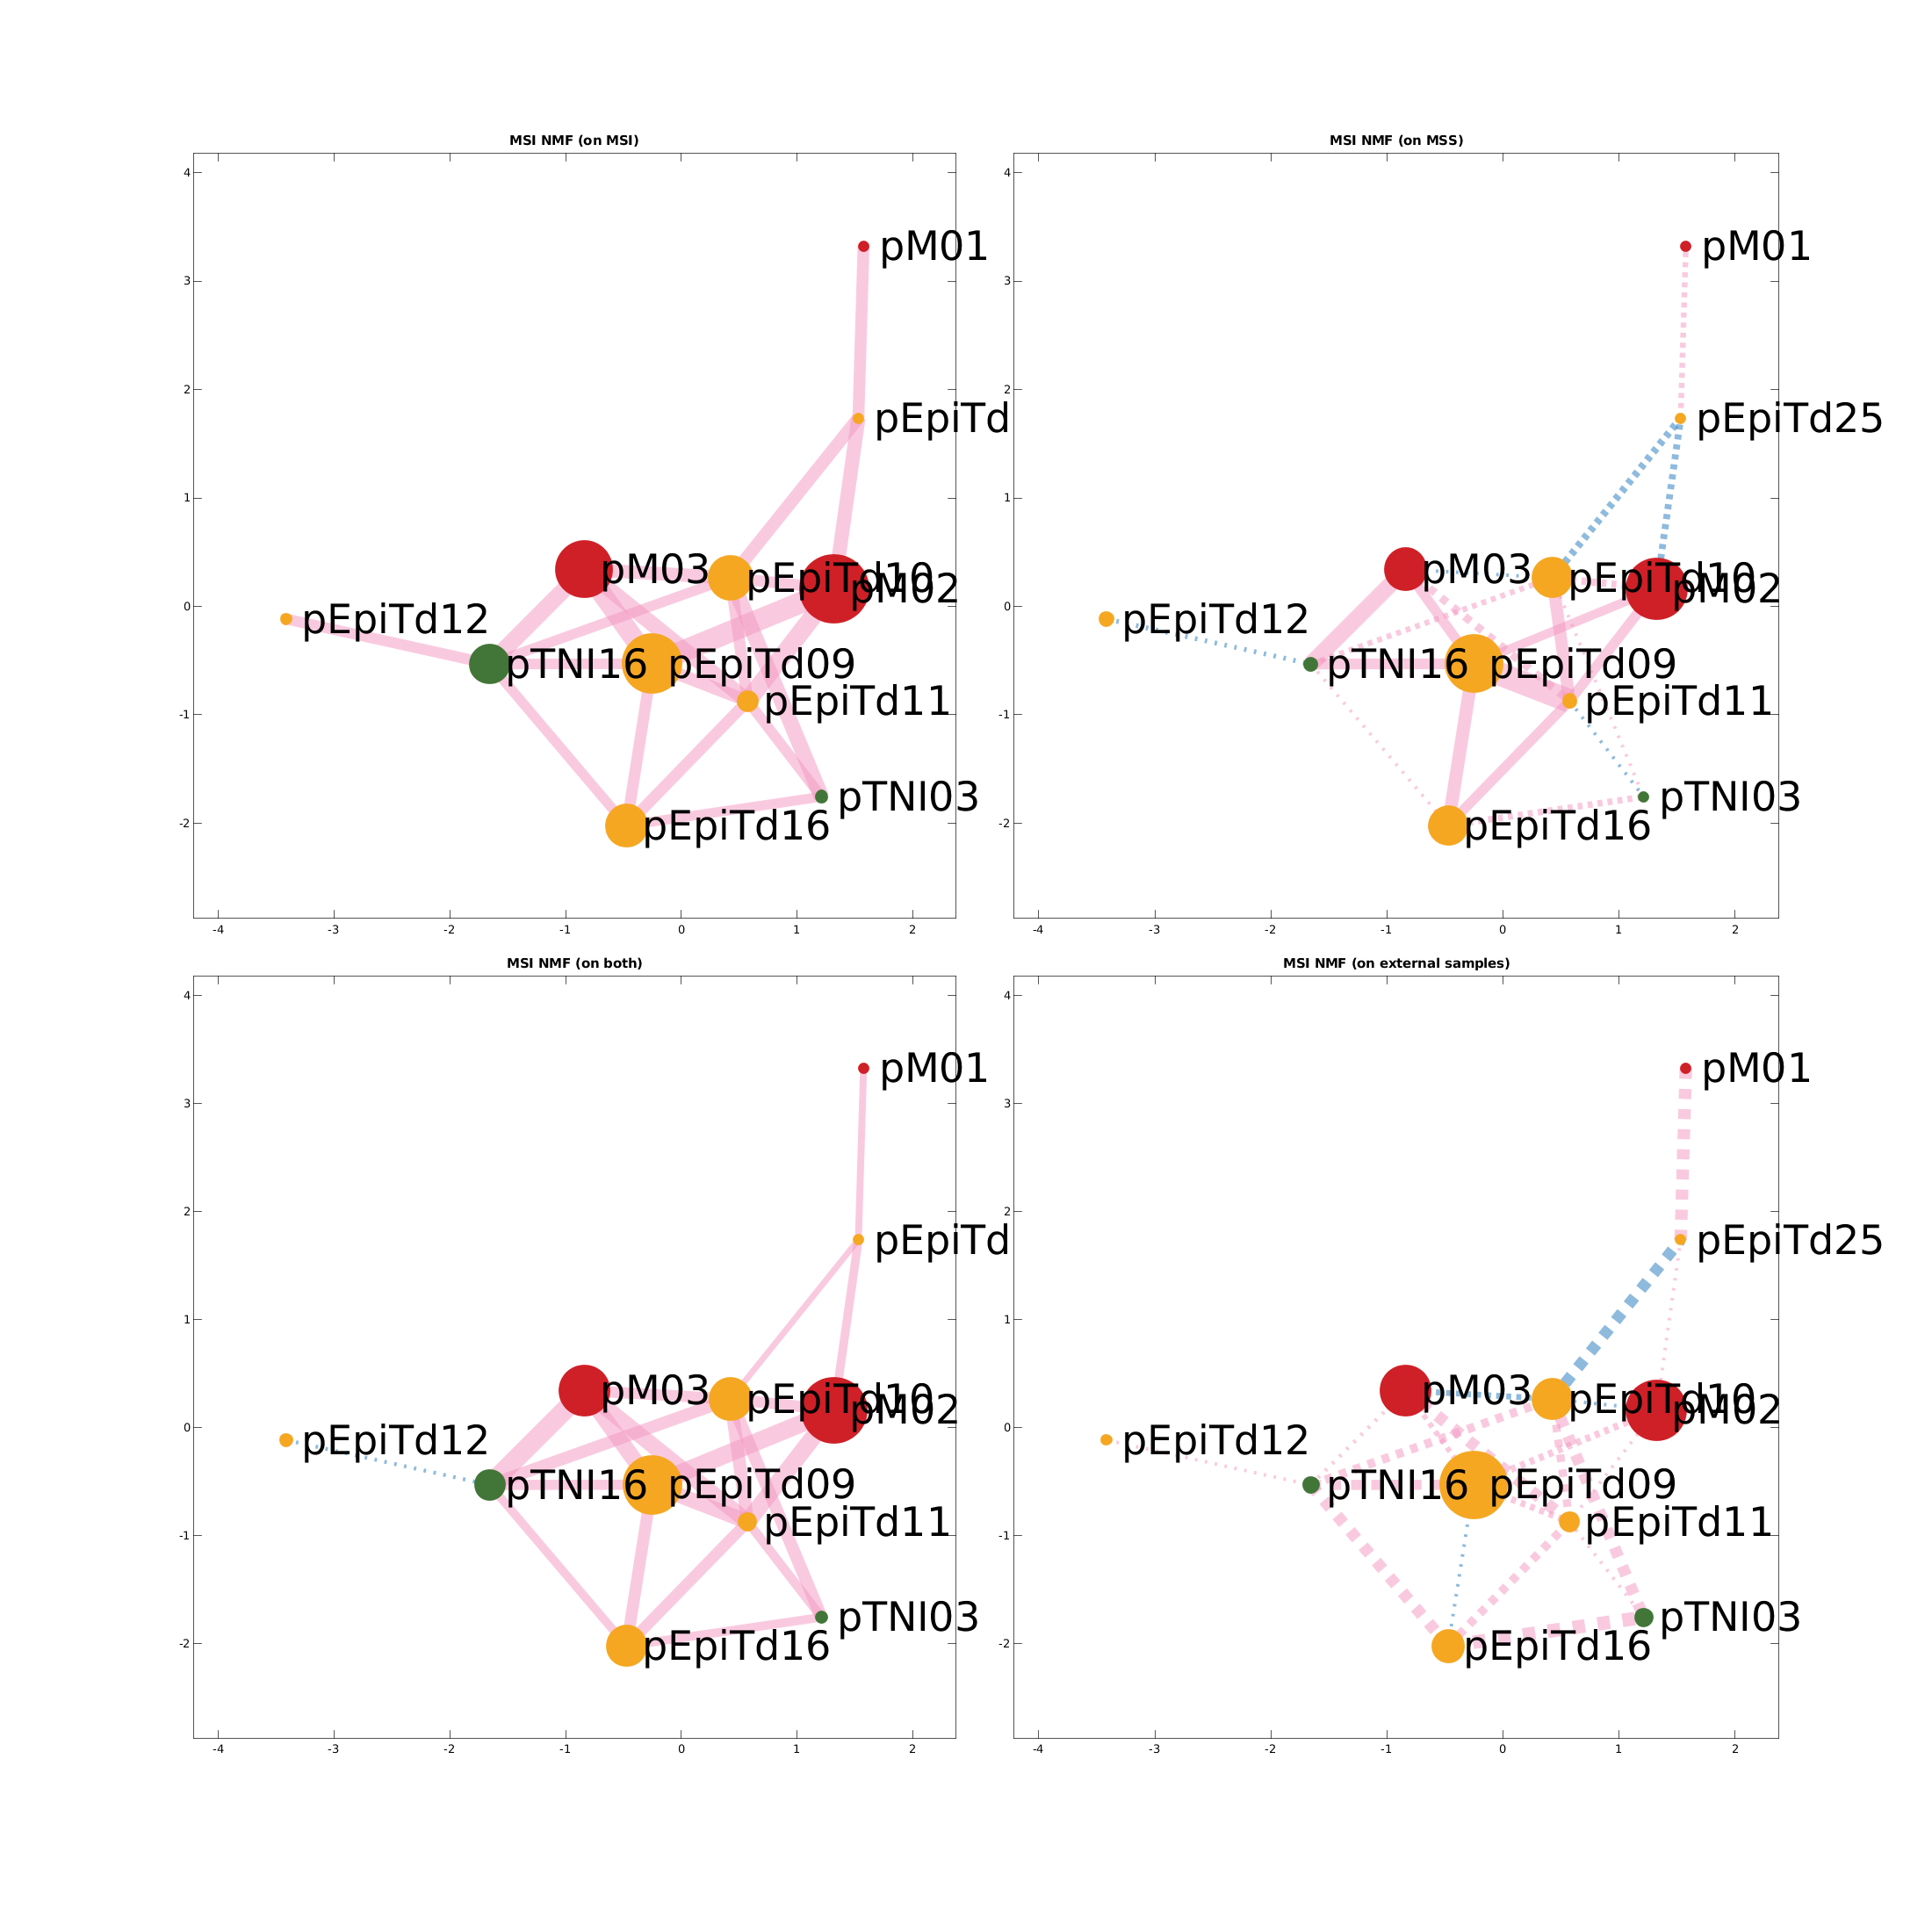

In [115]:
%% Module network plots

zopts = [];
zopts.useRsign = 0;

[zRmsi,~,zFDRmsi] = extractSquarePvalFdr(zOutCC_MSI.outMS,zopts);

zopts.useRsign = 1;
[zRboth,~,zFDRboth] = extractSquarePvalFdr(zOutCC_MSI_both.outMS,zopts,zRmsi);
[zRextern,~,zFDRextern] = extractSquarePvalFdr(zOutCC_extern.outMS,zopts,zRmsi);
[zRmss,~,zFDRmss] = extractSquarePvalFdr(zOutCC_MSI_MSS.outMS,zopts,zRmsi);

[~,zia,zib] = intersect(zOutCC_MSI.outMS.hMatNames,zG.Nodes.Names);

zord = zia(argsort(zib));
assert(isequal(zOutCC_MSI.outMS.hMatNames(zord),zG.Nodes.Names));
assert(isequal(zOutCC_MSI_both.outMS.hMatNames(zord),zG.Nodes.Names));
assert(isequal(zOutCC_extern.outMS.hMatNames(zord),zG.Nodes.Names));
assert(isequal(zOutCC_MSI_MSS.outMS.hMatNames(zord),zG.Nodes.Names));

zRmsi = zRmsi(zord,zord);
zRboth = zRboth(zord,zord);
zRextern = zRextern(zord,zord);
zRmss = zRmss(zord,zord);

zFDRmsi = zFDRmsi(zord,zord);
zFDRboth = zFDRboth(zord,zord);
zFDRextern = zFDRextern(zord,zord);
zFDRmss = zFDRmss(zord,zord);

clear zOutQ
zOutQ.names = zOutCC_MSI.outMS.hMatNames;
assert(isequal(zOutQ.names,zOutCC_MSI_both.outMS.hMatNames));
assert(isequal(zOutQ.names,zOutCC_extern.outMS.hMatNames));
%%
zOutQ.meanQ75msi = mean(zOutCC_MSI.outMS.outSum(:,:,3),2);
zOutQ.meanQ75both = mean(zOutCC_MSI_both.outMS.outSum(:,:,3),2);
zOutQ.meanQ75extern = nanmean(zOutCC_extern.outMS.outSum(:,:,3),2);
zOutQ.meanQ75mss = nanmean(zOutCC_MSI_MSS.outMS.outSum(:,:,3),2);
zOutQ.meanQ75normal = nanmean(zOutCC_MSI_Normal.outMS.outSum(:,:,3),2);


zz = struct2table(zOutQ);

zzM = table2array(zz(:,2:end));
zMeanQ = mean(zzM(:));
zStdQ = std(zzM(:));

zTrimNode = @(x)regexprep(x,'.*_zz_','');

zMapQmsi = containers.Map((zOutQ.names),zOutQ.meanQ75msi);
zMapQmss = containers.Map((zOutQ.names),zOutQ.meanQ75mss);

zMapQboth = containers.Map((zOutQ.names),zOutQ.meanQ75both);
zMapQextern = containers.Map((zOutQ.names),zOutQ.meanQ75extern);
zMapQnormal = containers.Map((zOutQ.names),zOutQ.meanQ75normal);


zSel = triu(true(size(zRboth,1)),1);
zAll = [ zRboth(zSel); zRmsi(zSel); zRextern(zSel); zRmss(zSel) ];

zMeanE = mean(zAll(:));
zMeanStd = std(zAll(:));


zFl = fieldnames(zOutNew_alt);

zTrimNode = @(x)regexprep(x,'.*_zz_','');
zRefNodeNames = zOutQ.names;

cmapV = discColorMapper(zG.Nodes.type,{'#F5A722' '#CF2027' '#427638'});

zOutNew_alt_rename = structfun(@(x)nanvalues(zNameToFull,nanvalues(zNameMap,x)),zOutNew_alt,'unif',0);
% cellToColTable(zOutNew_alt_rename);


makeLegend = 0;
nodeSizeF = @(x)max(3+10*x,5)*1.5

for zSetI = 1:length(zFl)
%%
    zf = zFl{zSetI}
    zSet = zOutNew_alt.(zf);

    zSel = ismember(zG.Nodes.Names,zSet);
    zGsub = subgraph(zG,zSel);
    zGorig = zGsub.Edges.Weight;
    
    zGsub.Edges.Weight = sqrt(2*(1-zGorig));
    
    rng(42)
    if makeLegend
        figure('Position',[1 1 2700 1700]);    
        subplot1(2,3);
    else
        figure('Position',[1 1 2000 1700]);    
        subplot1(2,2);
    end
        
    
    zNames = zGsub.Nodes.Names;    
    zT = zGsub.Nodes.type;
    
    [~,zia,zib] = intersect(zNames,zG.Nodes.Names);
    
    zOrdS = zib(argsort(zia));

    zCmap = cmapV.getColorArray(zT);
    
    zE = arrayfun(@(x,y)zRmsi(x,y),zOrdS(zGsub.Edges.EndNodes(:,1)),zOrdS(zGsub.Edges.EndNodes(:,2)));   
    zFDRe = arrayfun(@(x,y)zFDRmsi(x,y),zOrdS(zGsub.Edges.EndNodes(:,1)),zOrdS(zGsub.Edges.EndNodes(:,2)));   
    
    zMSize = log2(nanvalues(zMapQmsi,zGsub.Nodes.Names)./nanvalues(zMapQnormal,zGsub.Nodes.Names))
    zMSize = nodeSizeF(zMSize)
    
    subplot1(1);
    zp = plot_graph_coAct(zGsub,nanvalues(zNameMap,zNames),zMSize,zE,zCmap,zMeanE,zMeanStd,zFDRe);

    zPosX = zp.XData;
    zPosY = zp.YData;
    zNames = zp.NodeLabel;
    title('MSI NMF (on MSI)');

    subplot1(2);

          
    zE = arrayfun(@(x,y)zRmss(x,y),zOrdS(zGsub.Edges.EndNodes(:,1)),zOrdS(zGsub.Edges.EndNodes(:,2))); 
    zFDRe = arrayfun(@(x,y)zFDRmss(x,y),zOrdS(zGsub.Edges.EndNodes(:,1)),zOrdS(zGsub.Edges.EndNodes(:,2))); 

    zMSize = log2(nanvalues(zMapQmss,zGsub.Nodes.Names)./nanvalues(zMapQnormal,zGsub.Nodes.Names))
    zMSize = nodeSizeF(zMSize);
  
    zNames = zGsub.Nodes.Names;
    zT = zGsub.Nodes.type;

    zCmap = cmapV.getColorArray(zT);
    
    zp = plot_graph_coAct(zGsub,nanvalues(zNameMap,zNames),zMSize,zE,zCmap,zMeanE,zMeanStd,zFDRe);

    zPosX = zp.XData;
    zPosY = zp.YData;
    zNames = zp.NodeLabel;
    title('MSI NMF (on MSS)');
    
   %%
    subplot1(3);

    zE = arrayfun(@(x,y)zRboth(x,y),zOrdS(zGsub.Edges.EndNodes(:,1)),zOrdS(zGsub.Edges.EndNodes(:,2))); 
    zFDRe = arrayfun(@(x,y)zFDRboth(x,y),zOrdS(zGsub.Edges.EndNodes(:,1)),zOrdS(zGsub.Edges.EndNodes(:,2))); 

    zMSize = log2(nanvalues(zMapQboth,zGsub.Nodes.Names)./nanvalues(zMapQnormal,zGsub.Nodes.Names));
    zMSize = nodeSizeF(zMSize);
  
    zNames = zGsub.Nodes.Names;
    zT = zGsub.Nodes.type;

    zCmap = cmapV.getColorArray(zT);
    
    zp = plot_graph_coAct(zGsub,nanvalues(zNameMap,zNames),zMSize,zE,zCmap,zMeanE,zMeanStd,zFDRe);

    zPosX = zp.XData;
    zPosY = zp.YData;
    zNames = zp.NodeLabel;
    title('MSI NMF (on both)');
 
    subplot1(4);
    % [~,zia,zib] = intersect(zTrimNode(zRefNodeNames),zGsub.Nodes.Names);
    zNames = zGsub.Nodes.Names;

    zE = arrayfun(@(x,y)zRextern(x,y),zOrdS(zGsub.Edges.EndNodes(:,1)),zOrdS(zGsub.Edges.EndNodes(:,2))); 
    zFDRe = arrayfun(@(x,y)zFDRextern(x,y),zOrdS(zGsub.Edges.EndNodes(:,1)),zOrdS(zGsub.Edges.EndNodes(:,2))); 

        
    zMSize = log2(nanvalues(zMapQextern,zGsub.Nodes.Names)./nanvalues(zMapQnormal,zGsub.Nodes.Names));
    zMSize = nodeSizeF(zMSize);

    zp = plot_graph_coAct(zGsub,nanvalues(zNameMap,zNames),zMSize,zE,zCmap,zMeanE,zMeanStd,zFDRe);

    zp.XData = zPosX;
    zp.YData = zPosY;
    zNames = zp.NodeLabel;
    title('MSI NMF (on external samples)');
    

    if makeLegend
        zAlegend = zeros(10);
        zAlegend(1,2) = 0.1;
        zAlegend(3,4) = 0.2;
        zAlegend(5,6) = 0.3;
        zAlegend(7,8) = 0.6;
        zAlegend(9,10) = 0.8;

        zGleg = graph(zAlegend,'upper');

        subplot1(5);

        zLWidths = max(30*abs(zGleg.Edges.Weight),3);

        zLegNames = { '' '0.1';'' '0.2';'' '0.3';'' '0.6';'' '0.8'; }';

        gg = plot(zGleg,'LineWidth',zLWidths,'NodeLabel',zLegNames(:));


        subplot1(6);
        clear zNodeT;
        zLegNames = { '0.25'; '0.5'; '1'; '2'; '4'; '8';'16' };
        zNodeT.Names = zLegNames;
        zNodeT = struct2table(zNodeT);
        zAleg = zeros(length(zLegNames));

        zGleg = graph(zAleg,zNodeT);
        zNodeS = nodeSizeF(log2(str2double(zLegNames)));

        gg = plot(zGleg,'NodeLabel',zLegNames(:),'MarkerSize',zNodeS);
    end

    zFig = gcf;
    zOutF = sprintf('%s/ccNMF_coAct_EpiMSI_4way_absWeightRadj_%s_graph',zOutP,zf);
    print_plot(zFig,zOutF,outDirPlot,outSuf,1);
  
end


zFlist =

  4x1 cell array

    {'EpiTMSIv4ForceK29'}
    {'T'                }
    {'Myeloid'          }
    {'Strom'            }

Using dynamic elbow based threshold rule.
Elbow found at 0.440000 (rank: 44)
Elbow found at 0.250000 (rank: 25)
Elbow found at 0.440000 (rank: 44)
Elbow found at 0.450000 (rank: 45)
Elbow found at 0.310000 (rank: 31)
Elbow found at 0.430000 (rank: 43)
Elbow found at 0.380000 (rank: 38)
Elbow found at 0.440000 (rank: 44)
Elbow found at 0.300000 (rank: 30)
Elbow found at 0.450000 (rank: 45)
Elbow found at 0.500000 (rank: 50)
Elbow found at 0.450000 (rank: 45)
Elbow found at 0.410000 (rank: 41)
Elbow found at 0.230000 (rank: 23)
Elbow found at 0.400000 (rank: 40)
Elbow found at 0.450000 (rank: 45)
Elbow found at 0.390000 (rank: 39)
Elbow found at 0.390000 (rank: 39)
Elbow found at 0.450000 (rank: 45)
Elbow found at 0.320000 (rank: 32)
Elbow found at 0.350000 (rank: 35)
Elbow found at 0.250000 (rank: 25)
Elbow found at 0.540000 (rank: 54)
Elbow found at 0.32

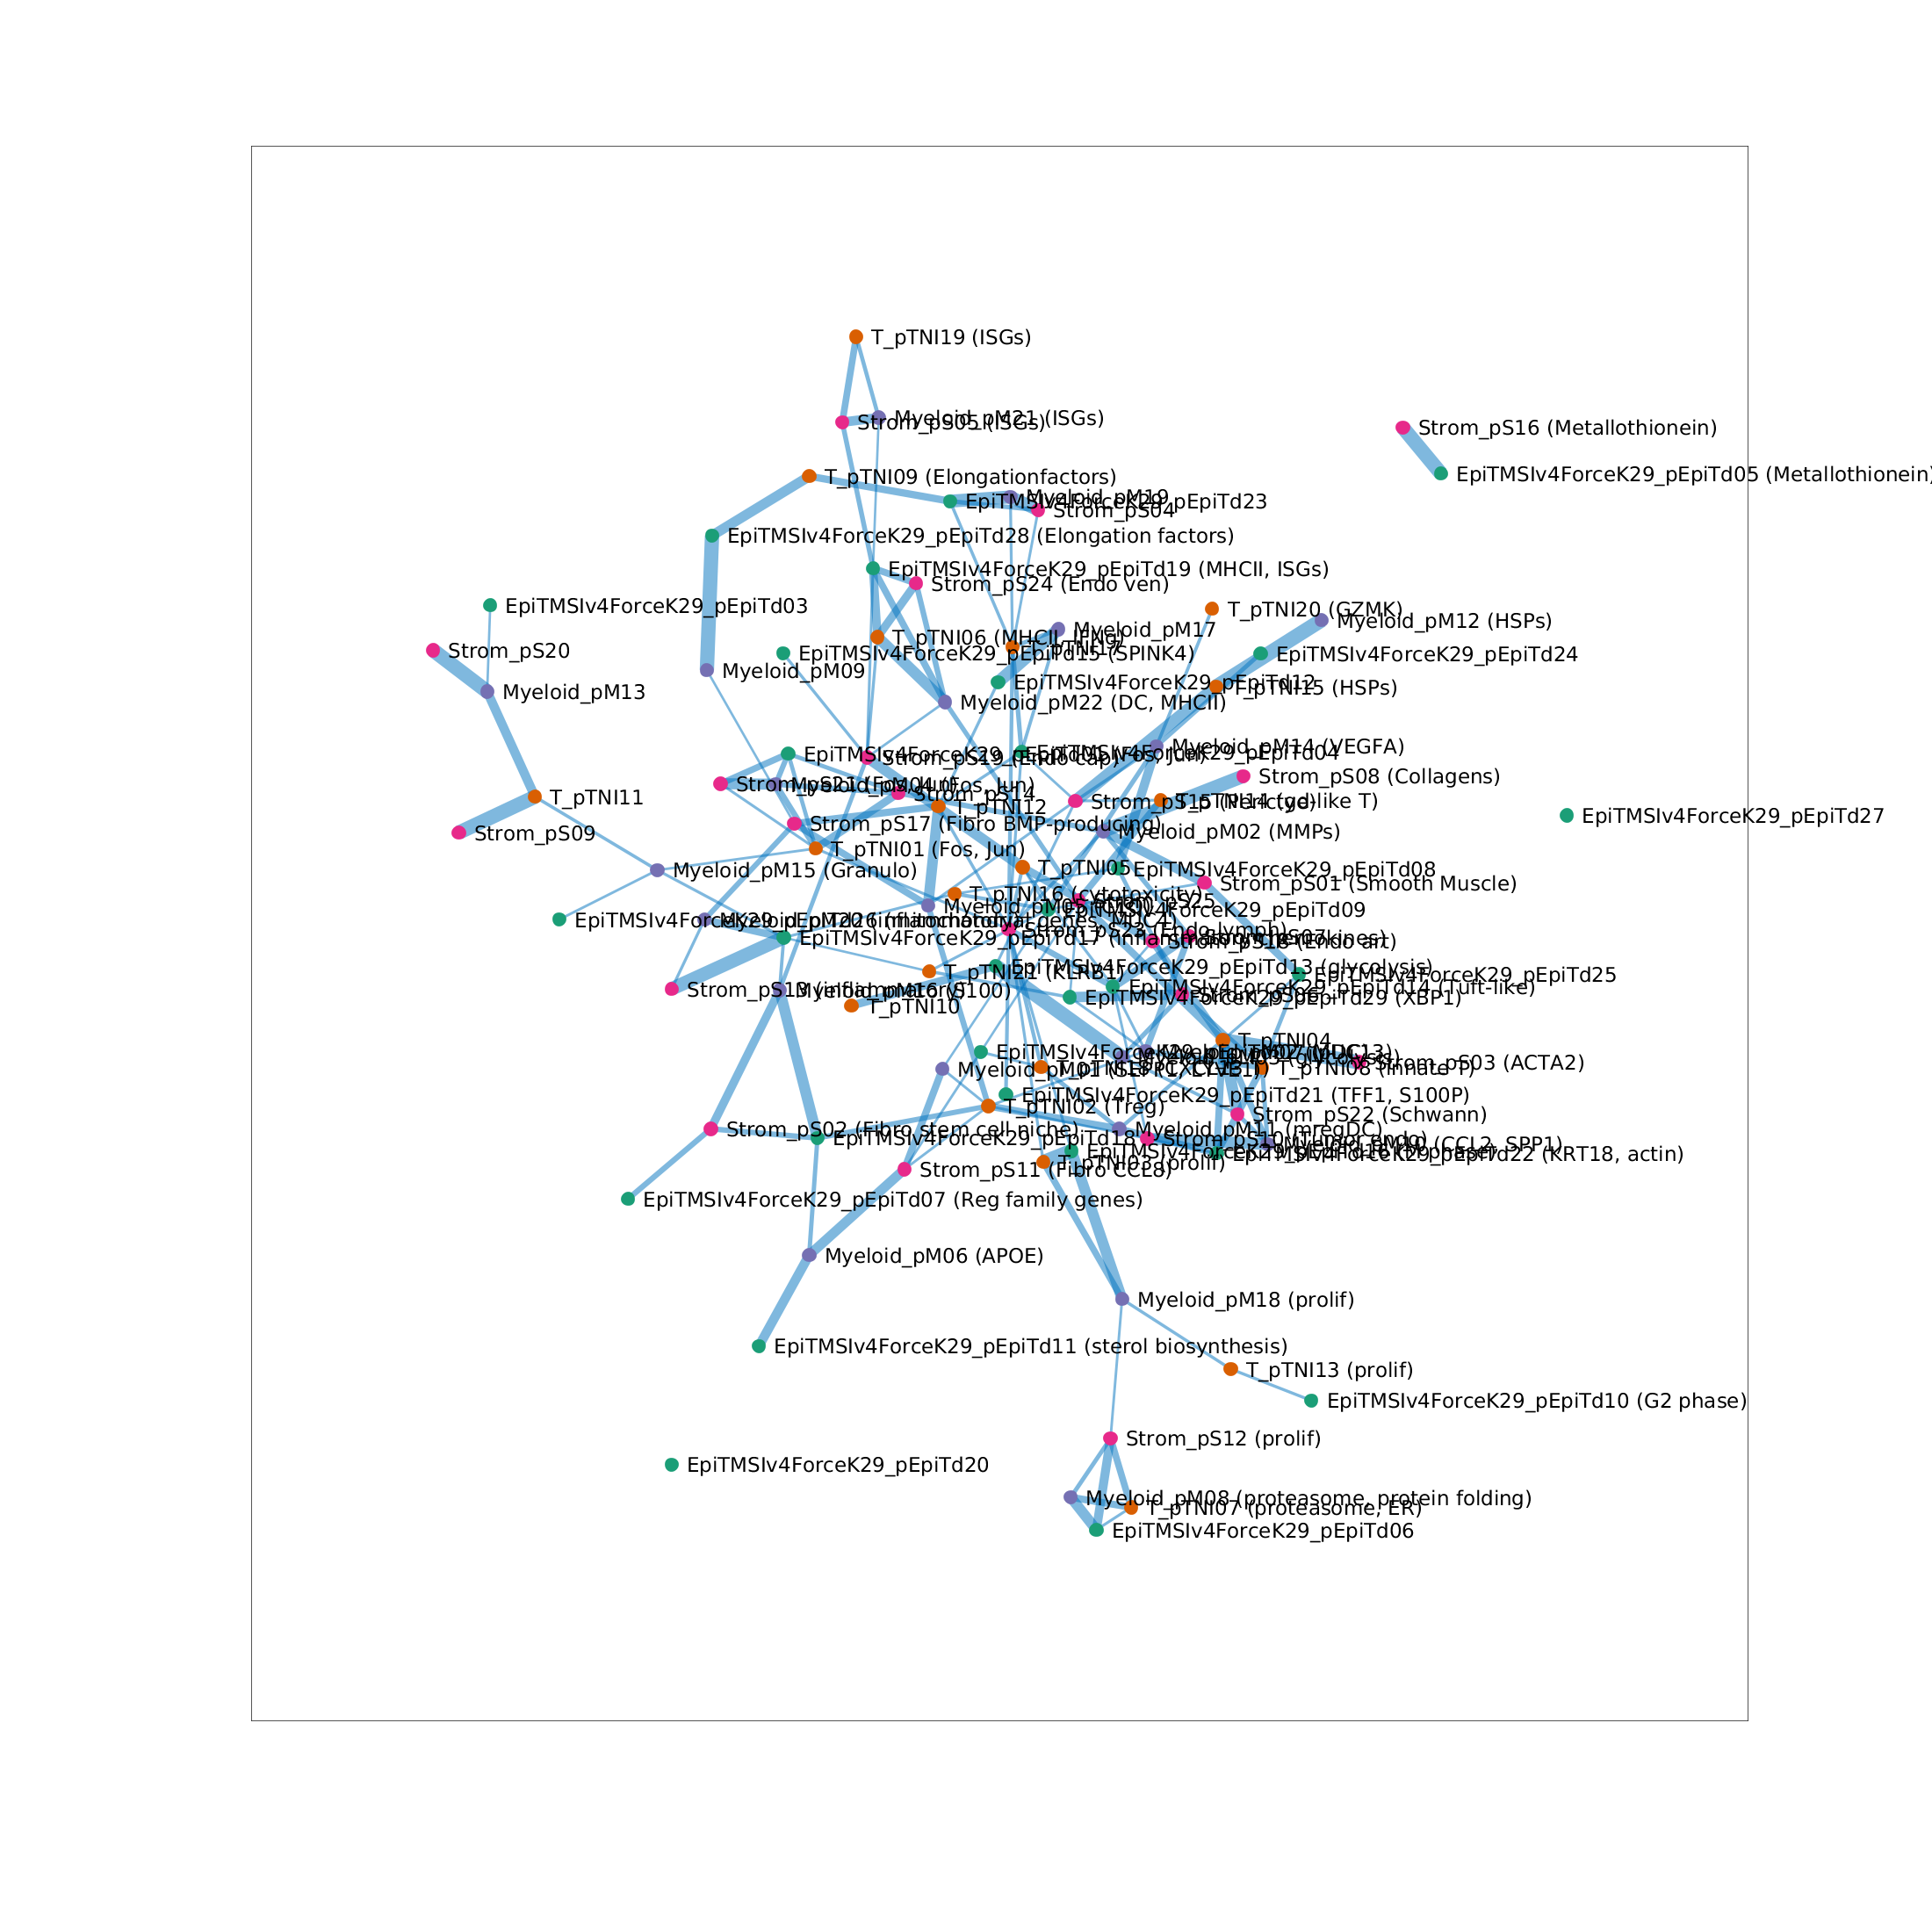

In [116]:
%% Figure 5 - Jaccard similiarity

zTestStruct = [];
zTestStruct.EpiTMSIv4ForceK29 = { 'Epi' };
%zTestStruct.EpiTMSSv4ForceK32 = { 'Epi' };
% zTestStruct.EpiTGlobalv5ForceK43 = { 'Epi' };
%zTestStruct.EpiN = { 'Epi' };
zTestStruct.T = {'TNKILC'};
zTestStruct.Myeloid = { 'Myeloid' };
%zTestStruct.B = { 'B' };
%zTestStruct.Mast = { 'Mast' };
%zTestStruct.Plasma = { 'Plasma' };
zTestStruct.Strom = { 'Strom' };

zopts = [];
zFlist = fieldnames(zTestStruct)

%%


clear zTopW outWnames outW
for zi = 1:length(zFlist)
    
    cf = zFlist{zi};
    ctype = zTestStruct.(cf){1};

    zW = ccNMFexpAlt.Wmat.(cf);
    outWnames{zi} = mergeStringPair(cf,ccNMFexpAlt.wNamesSt.(cf));
    
    
    zWalt = ccNMFextractTopGenes(zW,[],100,51);
    outW{zi} = zWalt;

    
    zTopW(:,zi) = any(zWalt,2);
end

%

zTopWall = any(zTopW,2);
sum(zTopWall)

%

zW = horzcat(outW{:});
zW = zW(zTopWall,:);

zWnames = concatCell_to_cell(outWnames);
zWgenes = ccNMFexpAlt.geneID(zTopWall);


%%
% simKnn = knndist2simMatrix(zW,zopts);
% simKnn = (simKnn + simKnn')./2;
zn = size(zW,2);
zWjaccard = zeros(zn);
for i = 1:zn
    for j = (i+1):zn
        zWjaccard(i,j) = (nansum(zW(:,i)&zW(:,j)))/(nansum(zW(:,i)|zW(:,j)));
        zWjaccard(j,i) = zWjaccard(i,j);
    end
end



%%
% rng(42)
zKnnS = d2p(1-zWjaccard,30,1e-5);
zEmbed = tsne_p(zKnnS, [], 2);

% zKnnS = simKnn;

%%
[zi,zj,zv] = find(zKnnS);
zsel = zi > zj & zv > quantile(nonzeros(triu(zKnnS,1)),0.96)
zi = zi(zsel);
zj = zj(zsel);
zv = zv(zsel);

length(zv)
zKnnEdgeT = table([zi zj],'VariableNames',{'EndNodes'});
zKnnEdgeT.Weight = zv;

%%
clear zNodes
zNodes.Names = zWnames;
zNodes.type = regexprep(zWnames,'_.*','');

zNodes = struct2table(zNodes)

zG = graph(zKnnEdgeT,zNodes)

%%

zLWidths = max(5 + 3*zscore(zG.Edges.Weight),1);

[zTwId,zN] = grp2idx(zG.Nodes.type);
zCmap = brewermap(length(zN),'Dark2');

figure('Position',[1320 1 1800 1697]);
zp = plot(zG,'Interpreter','None','layout','force','usegravity','on','iterations',50,'NodeLabel',zG.Nodes.Names,'NodeColor',zCmap(zTwId,:),'MarkerSize',10,'WeightEffect','none','LineWidth',zLWidths,'XStart',zEmbed(:,1),'YStart',zEmbed(:,2));

%%

zFig = gcf();
zOutF = sprintf('%s/Fig5b_crc10x_c295v4_EpiMSI_TMStr_jaccard_tsnePerp30',zOutP);
print_plot(zFig,zOutF,outDirPlot,outSuf)

%%